#### The Project is all about the scrape the #tags give to each person. In that i got the #MaharastraPolitics the timeline was from oct23rd - nov26th 2019.

#### What is Maharastrapolitics.? we all know that in maharastra there are lots of politics happening. BJP and Congress are fighting for the government formation. Finally now congress and shivasena formed the government. We would collect all the tweets from the oct23rd to nov26th and do sentiment analysis and know what is the sentiment.

#### I scraped #maharastrapolitics tag from the twitter

### How did i Scrape data..?

#### -> I SCRAPPED THE DATA FROM TWITTER -> SEARCH THE #MaharastraPolitics in the search query-> CLICK ON ADVANCE SEARCH AND FILL THE DETAILS AS PER NEEDED LIKE EXACT WORDS,HASTAGS,LANGUAGE,DATE OF EVENT OCCURING AND END DATE -> COPY THE URL APPEARED ON THE SEARCH BAR -> INSTALL ALL LIBRARIES OF TWEET SCRAPPER -> OPEN ANACONDA PROMPT -> IN ANACONDA PROMPT INSTALL "PIP INSTALL -R REQUIREMENTS" -> IN ANACONDA PROMPT "SCRAPY CRAWL TWEETSCRAPPER -A QUERY="GIVE THE SAVED URL FROM TWITTER" -> IT WILL SCRAP ALL THE TWEETS ALONG WITH THE PAGES -> ALL THE SCRAPPED PAGES DIRECTLY STORED IN TWEETSCRAPPER -DATA FOLDER -> DATA FOLDER WILL GET TWO FILES -> ONE IS -> DATA( IT CONSISTS OF FILES FOR EACH OF THE TWEET),OTHER IS ->TWEETS(EMPTY FILE) -> WE WILL EXECUTE A CODE FOR CONVERTING ALL THE FILES INTO A CSV FILE-> -> THE FILE WILL AUTOMATICALLY GET SAVED IN TWEETSCRAPPER -> THE DATASET IS NOW READY FOR EXECUTION


In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = None
pd.options.display.max_rows = None

pd.options.display.max_colwidth=-1

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from gensim import corpora, models
import gensim
import nltk
##nltk.download("stopwords")


%autoreload 2

# Visualizations
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns
import re


import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim

UsageError: Line magic function `%autoreload` not found.


In [2]:
df=pd.read_csv("MaharastraPolitics.csv",sep=",")# IMPORTING THE DATA

In [3]:
df.head(5)# CHECKING THE FIRST TOP 5 DATA

ID             datetime has_media  is_reply  is_retweet  \
0  1198282561908346887  2019-11-23 22:20:00  True      False     False        
1  1198465358438338560  2019-11-24 10:26:22  NaN       False     False        
2  1198077360601350145  2019-11-23 08:44:36  NaN       False     False        
3  1194264004153290753  2019-11-12 20:11:41  NaN       False     False        
4  1198129320352333824  2019-11-23 12:11:04  NaN       False     False        

                        medias  nbr_favorite  nbr_reply  nbr_retweet  \
0  ['https://t.co/vFJhXB0CEQ']  56            7          7             
1  NaN                          7             2          2             
2  NaN                          0             0          0             
3  NaN                          1             0          0             
4  NaN                          2             0          0             

                                                                                                                                                                                                                                                                                                                                        text  \
0  "It would all depend on what Sharad Pawar would choose to do. For example, if he says that these people have broken away from our party without my consent, then certainly the anti-defection law can apply." | @gaurav5173  \n\n#MaharashtraPolitics  \n\n https:// thewire.in/politics/mahar ashtra-sharad-pawar-floor-test-speaker   …   
1  Frustrated newspaper of India! \n\n#MaharashtraPolitics  #MahaMasterstroke  #ShivaSena pic.twitter.com/9bweznESEQ                                                                                                                                                                                                                           
2  # UddhavThackeray  Right now..\n#MaharashtraPolitics   pic.twitter.com/0VOBq8FHHb                                                                                                                                                                                                                                                           
3  Let's trend #AnjanaMaafiWapasLo  \n\nUrge @anjanaomkashyap  to take back her apology for calling Aaditya Thackeray Shiv Sena ka Rahul Gandhi. She was right about him. \n\nUse hashtag #AnjanaMaafiWapasLo  \n\n#presidentrule  \n#MaharashtraGovtFormation  \n#MaharashtraPolitics                                                         
4  Priya Dutt slams Congress for delaying decision\n#MaharashtraPolitics   https:// twitter.com/PriyaDutt_INC/ status/1198093222846681088   …                                                                                                                                                                                                  

                                           url              user_id  \
0  /thewire_in/status/1198282561908346887       3150940290            
1  /BhatChiru/status/1198465358438338560        1152114081848913927   
2  /Northlate/status/1198077360601350145        799856224502067201    
3  /bjpbhaiyaa/status/1194264004153290753       190997072             
4  /AfrozJournalist/status/1198129320352333824  3194036948            

     usernameTweet  
0  thewire_in       
1  BhatChiru        
2  Northlate        
3  bjpbhaiyaa       
4  AfrozJournalist

### TYPES OF COLUMNS AND DATATYPES

In [9]:
df.info()#INFORMATION OF ALL THE DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53354 entries, 0 to 53353
Data columns (total 13 columns):
ID               53354 non-null int64
datetime         53354 non-null object
has_media        3036 non-null object
is_reply         53354 non-null bool
is_retweet       53354 non-null bool
medias           3036 non-null object
nbr_favorite     53354 non-null int64
nbr_reply        53354 non-null int64
nbr_retweet      53354 non-null int64
text             53354 non-null object
url              53354 non-null object
user_id          53354 non-null int64
usernameTweet    53354 non-null object
dtypes: bool(2), int64(5), object(6)
memory usage: 4.6+ MB


In [10]:
df['medias'].value_counts()

[]                             158
['https://t.co/gRQXfpN1g2']    26 
['https://t.co/XwqTtTvNpL']    15 
['https://t.co/aLXXGDYJNF']    13 
['https://t.co/DAR1WNmCmu']    12 
['https://t.co/IH0OCpTLBS']    11 
['https://t.co/Fbzw6mR9Q5']    11 
['https://t.co/l6TFpl4Vve']    10 
['https://t.co/MKSWfGPK1s']    10 
['https://t.co/4cSB7LMLJV']    10 
['https://t.co/vaVpS3Q1uO']    9  
['https://t.co/T9PfKT70Yi']    9  
['https://t.co/JnwKVrMqrX']    9  
['https://t.co/EgGbkz5wiX']    8  
['https://t.co/DfGsmyJzUB']    8  
['https://t.co/dBZ1SFh7sU']    8  
['https://t.co/8Vc2KUm37s']    8  
['https://t.co/YfgSA8feiV']    7  
['https://t.co/uiA9AydtNr']    7  
['https://t.co/1lfiptTart']    6  
['https://t.co/1yCkvef7Kw']    6  
['https://t.co/8Vc2KU4sfU']    6  
['https://t.co/gHjJKbF3iG']    5  
['https://t.co/kD2hoAVVZ9']    4  
['https://t.co/H7s23hQvQ9']    4  
['https://t.co/luJIqHfacO']    4  
['https://t.co/QBlfiLhh7j']    4  
['https://t.co/0GkPGphDlu']    4  
['https://t.co/vJaCz

In [3]:
tweets=df # STORING THE DATA SET INTO TWEETS
tweets.info() #INFORMATION OF ALL THE DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53354 entries, 0 to 53353
Data columns (total 13 columns):
ID               53354 non-null int64
datetime         53354 non-null object
has_media        3036 non-null object
is_reply         53354 non-null bool
is_retweet       53354 non-null bool
medias           3036 non-null object
nbr_favorite     53354 non-null int64
nbr_reply        53354 non-null int64
nbr_retweet      53354 non-null int64
text             53354 non-null object
url              53354 non-null object
user_id          53354 non-null int64
usernameTweet    53354 non-null object
dtypes: bool(2), int64(5), object(6)
memory usage: 4.6+ MB


### NO OF ROWS AND COLUMNS

In [12]:
tweets.shape # NO OF ROWS AND COLUMNS

(53354, 13)

In [13]:
tweets['datetime'].value_counts()

2019-11-23 09:17:01    9
2019-11-23 09:31:55    8
2019-11-23 10:09:50    8
2019-11-23 09:20:40    8
2019-11-23 09:19:41    8
2019-11-23 09:20:54    8
2019-11-23 10:07:45    7
2019-11-23 09:47:59    7
2019-11-23 10:05:58    7
2019-11-23 10:50:34    7
2019-11-23 09:17:23    7
2019-11-23 09:10:39    7
2019-11-23 10:09:05    7
2019-11-23 10:10:54    7
2019-11-23 09:40:50    7
2019-11-23 09:35:06    7
2019-11-23 09:22:48    7
2019-11-23 09:27:03    7
2019-11-23 09:23:22    7
2019-11-23 09:25:20    6
2019-11-23 09:45:02    6
2019-11-23 09:53:03    6
2019-11-23 09:26:05    6
2019-11-23 09:02:34    6
2019-11-23 09:13:11    6
2019-11-23 10:00:56    6
2019-11-23 10:27:56    6
2019-11-23 11:39:19    6
2019-11-23 10:46:38    6
2019-11-23 09:25:57    6
2019-11-23 09:32:19    6
2019-11-23 09:49:46    6
2019-11-23 09:39:51    6
2019-11-23 09:45:15    6
2019-11-23 09:08:31    6
2019-11-23 10:00:07    6
2019-11-23 08:57:45    6
2019-11-23 09:33:54    6
2019-11-23 09:53:10    6
2019-11-23 10:08:39    6


#### 1) TimeLine of DataSet Oct 21st to nov 26 2019

#### 2) Number of tweets in Dataset is 53354

In [14]:
len(tweets['text']) ## LENGTH OF THE TEXT(TWEETS)

53354

### CHECKING THE MISSING VALUES OF EACH COLUMNS

In [15]:
tweets.isnull().sum() # CHECKING THE MISSING VALUES OF EACH COLUMNS

ID               0    
datetime         0    
has_media        50318
is_reply         0    
is_retweet       0    
medias           50318
nbr_favorite     0    
nbr_reply        0    
nbr_retweet      0    
text             0    
url              0    
user_id          0    
usernameTweet    0    
dtype: int64

### Now we are droping the columns that are not required....for analysis..

In [16]:
tweets=tweets.drop(['ID','url','user_id','has_media','medias'],axis=1)

### Now finding the length of the each tweet

In [17]:
tweets['len_message']=tweets['text'].apply(lambda x:len(x.split())) # PASSING ALL THE TEXT TO FING THE LENGTH BY GIVING APPLY FUNCTION and STORING THE LENGTH OF TEXT IN A NEW COLUMN

In [18]:
tweets.head()

datetime  is_reply  is_retweet  nbr_favorite  nbr_reply  \
0  2019-11-23 22:20:00  False     False       56            7           
1  2019-11-24 10:26:22  False     False       7             2           
2  2019-11-23 08:44:36  False     False       0             0           
3  2019-11-12 20:11:41  False     False       1             0           
4  2019-11-23 12:11:04  False     False       2             0           

   nbr_retweet  \
0  7             
1  2             
2  0             
3  0             
4  0             

                                                                                                                                                                                                                                                                                                                                        text  \
0  "It would all depend on what Sharad Pawar would choose to do. For example, if he says that these people have broken away from our party without my consent, then certainly the anti-defection law can apply." | @gaurav5173  \n\n#MaharashtraPolitics  \n\n https:// thewire.in/politics/mahar ashtra-sharad-pawar-floor-test-speaker   …   
1  Frustrated newspaper of India! \n\n#MaharashtraPolitics  #MahaMasterstroke  #ShivaSena pic.twitter.com/9bweznESEQ                                                                                                                                                                                                                           
2  # UddhavThackeray  Right now..\n#MaharashtraPolitics   pic.twitter.com/0VOBq8FHHb                                                                                                                                                                                                                                                           
3  Let's trend #AnjanaMaafiWapasLo  \n\nUrge @anjanaomkashyap  to take back her apology for calling Aaditya Thackeray Shiv Sena ka Rahul Gandhi. She was right about him. \n\nUse hashtag #AnjanaMaafiWapasLo  \n\n#presidentrule  \n#MaharashtraGovtFormation  \n#MaharashtraPolitics                                                         
4  Priya Dutt slams Congress for delaying decision\n#MaharashtraPolitics   https:// twitter.com/PriyaDutt_INC/ status/1198093222846681088   …                                                                                                                                                                                                  

     usernameTweet  len_message  
0  thewire_in       43           
1  BhatChiru        8            
2  Northlate        6            
3  bjpbhaiyaa       30           
4  AfrozJournalist  12

In [19]:
tweets.columns # NAMES OF THE PRESENT COLUMNS

Index(['datetime', 'is_reply', 'is_retweet', 'nbr_favorite', 'nbr_reply',
       'nbr_retweet', 'text', 'usernameTweet', 'len_message'],
      dtype='object')

In [20]:
tweets.shape# AFTER DROP CHECKING THE ROWS AND COLUMNS

(53354, 9)

### EXPLORATORY DATA ANALYSIS

In [21]:
tweets.isnull().sum() # THERE IS NO MISIING VALUES IN THE GIVEN DATASET

datetime         0
is_reply         0
is_retweet       0
nbr_favorite     0
nbr_reply        0
nbr_retweet      0
text             0
usernameTweet    0
len_message      0
dtype: int64

In [22]:
tweets.groupby(['nbr_favorite', 'is_reply']).mean().describe()
# It is used to split the data into groups OF nbr_favorite', 'is_reply

nbr_reply  nbr_retweet  len_message
count  792.000000   792.000000   792.000000 
mean   39.044056    174.761486   22.359606  
std    109.066476   384.288157   9.920003   
min    0.000000     0.000000     3.000000   
25%    5.000000     23.404762    15.000000  
50%    12.392857    61.625000    21.961688  
75%    31.625000    158.250000   27.381250  
max    1453.000000  5397.000000  49.000000

In [23]:
tweets.groupby(['is_retweet', 'nbr_retweet']).mean().describe()
# It is used to split the data into groups OF is_retweet', 'nbr_retweet...

is_reply  nbr_favorite    nbr_reply  len_message
count  339.000000  339.000000    339.000000   339.000000 
mean   0.009019    1517.532015   68.654150    24.050545  
std    0.063110    2116.579981   158.158173   10.559463  
min    0.000000    1.080756      0.134184     3.000000   
25%    0.000000    321.366071    12.000000    17.000000  
50%    0.000000    811.000000    26.000000    23.214953  
75%    0.000000    2007.500000   62.000000    30.000000  
max    1.000000    23722.000000  1453.000000  50.000000

In [24]:
import matplotlib.pyplot as plt
df = pd.DataFrame(tweets, columns = ['nbr_favorite','nbr_reply','nbr_retweet'] ) # histogram for numerical data.
  
# create histogram for numeric data 
df.hist() 
  
# show plot 
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a0834e0>,
      dtype=object)

<Figure size 640x480 with 4 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1aab4f60>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1aab4c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1aab4dd8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1aaa3dd8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1aabfa58>],
 'means': []}

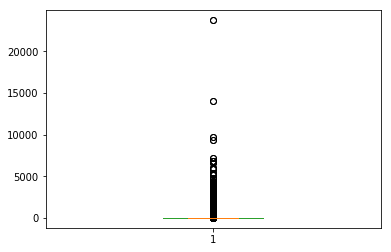

In [25]:
df.plot.box() 
  
# individual attribute box plot 
plt.boxplot(df['nbr_favorite']) 
plt.show()                            ### There are outliers in the nbr_favorite

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1ac75710>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1ac75b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1ac75390>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1ac7d1d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1ac7d518>],
 'means': []}

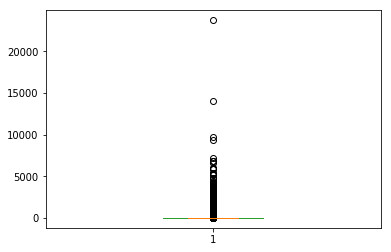

In [26]:
df.plot.box() 
  
# individual attribute box plot 
plt.boxplot(df['nbr_reply']) 
plt.show()                         ## there is outliers for the nbr reply that means tweets reply is more for one tweet

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1aed2240>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1aed2630>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1aec8e80>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1aed2cc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1aedc048>],
 'means': []}

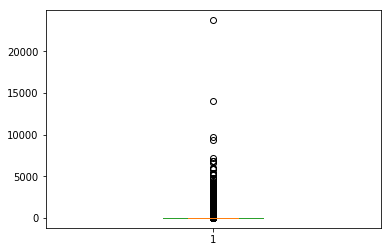

In [27]:
df.plot.box() 
  
# individual attribute box plot 
plt.boxplot(df['nbr_retweet']) 
plt.show()                            ## here there is more retweeted tweet in the tweets

In [28]:
tweets['len_message'].describe()

count    53354.000000
mean     21.676707   
std      11.571751   
min      1.000000    
25%      12.000000   
50%      19.000000   
75%      30.000000   
max      62.000000   
Name: len_message, dtype: float64

### Distribution of Length of Tweet

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
len(tweets) # total number of tweets

53354

Text(0.5, 1.0, ' Distribution of Length of Message')

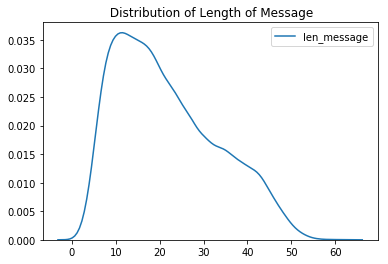

In [31]:
sns.kdeplot(tweets['len_message']).set_title(" Distribution of Length of Message") #GRAPH FOR LENGTH OF THE TEXT

#### Retweet Distribution

In [32]:
tweets['is_retweet'].value_counts()

False    53354
Name: is_retweet, dtype: int64

In [33]:
tweets['is_retweet']=tweets['text'].apply(lambda x:x[:2]=='RT')
tweets['is_retweet'].head()  # No of Retweets

0    False
1    False
2    False
3    False
4    False
Name: is_retweet, dtype: bool

In [34]:
tweets['is_retweet'].value_counts() 

False    53305
True     49   
Name: is_retweet, dtype: int64

Text(0.5, 1.0, ' Distribution of retweet')

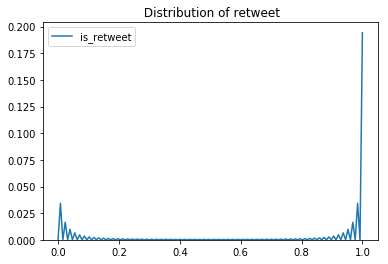

In [35]:
sns.kdeplot(tweets['is_retweet']).set_title(" Distribution of retweet") #GRAPH FOR Distribution of retweet

### here we can see that 49 people only retweeted and 53305 are not retweeted

In [36]:
tweets.head()

datetime  is_reply  is_retweet  nbr_favorite  nbr_reply  \
0  2019-11-23 22:20:00  False     False       56            7           
1  2019-11-24 10:26:22  False     False       7             2           
2  2019-11-23 08:44:36  False     False       0             0           
3  2019-11-12 20:11:41  False     False       1             0           
4  2019-11-23 12:11:04  False     False       2             0           

   nbr_retweet  \
0  7             
1  2             
2  0             
3  0             
4  0             

                                                                                                                                                                                                                                                                                                                                        text  \
0  "It would all depend on what Sharad Pawar would choose to do. For example, if he says that these people have broken away from our party without my consent, then certainly the anti-defection law can apply." | @gaurav5173  \n\n#MaharashtraPolitics  \n\n https:// thewire.in/politics/mahar ashtra-sharad-pawar-floor-test-speaker   …   
1  Frustrated newspaper of India! \n\n#MaharashtraPolitics  #MahaMasterstroke  #ShivaSena pic.twitter.com/9bweznESEQ                                                                                                                                                                                                                           
2  # UddhavThackeray  Right now..\n#MaharashtraPolitics   pic.twitter.com/0VOBq8FHHb                                                                                                                                                                                                                                                           
3  Let's trend #AnjanaMaafiWapasLo  \n\nUrge @anjanaomkashyap  to take back her apology for calling Aaditya Thackeray Shiv Sena ka Rahul Gandhi. She was right about him. \n\nUse hashtag #AnjanaMaafiWapasLo  \n\n#presidentrule  \n#MaharashtraGovtFormation  \n#MaharashtraPolitics                                                         
4  Priya Dutt slams Congress for delaying decision\n#MaharashtraPolitics   https:// twitter.com/PriyaDutt_INC/ status/1198093222846681088   …                                                                                                                                                                                                  

     usernameTweet  len_message  
0  thewire_in       43           
1  BhatChiru        8            
2  Northlate        6            
3  bjpbhaiyaa       30           
4  AfrozJournalist  12

### Hashtags

In [37]:
import re

In [38]:
def find_hashtags(text):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', text)   

In [39]:
tweets['hashtags']=tweets.text.apply(find_hashtags)

In [40]:
tweets.head(5)

datetime  is_reply  is_retweet  nbr_favorite  nbr_reply  \
0  2019-11-23 22:20:00  False     False       56            7           
1  2019-11-24 10:26:22  False     False       7             2           
2  2019-11-23 08:44:36  False     False       0             0           
3  2019-11-12 20:11:41  False     False       1             0           
4  2019-11-23 12:11:04  False     False       2             0           

   nbr_retweet  \
0  7             
1  2             
2  0             
3  0             
4  0             

                                                                                                                                                                                                                                                                                                                                        text  \
0  "It would all depend on what Sharad Pawar would choose to do. For example, if he says that these people have broken away from our party without my consent, then certainly the anti-defection law can apply." | @gaurav5173  \n\n#MaharashtraPolitics  \n\n https:// thewire.in/politics/mahar ashtra-sharad-pawar-floor-test-speaker   …   
1  Frustrated newspaper of India! \n\n#MaharashtraPolitics  #MahaMasterstroke  #ShivaSena pic.twitter.com/9bweznESEQ                                                                                                                                                                                                                           
2  # UddhavThackeray  Right now..\n#MaharashtraPolitics   pic.twitter.com/0VOBq8FHHb                                                                                                                                                                                                                                                           
3  Let's trend #AnjanaMaafiWapasLo  \n\nUrge @anjanaomkashyap  to take back her apology for calling Aaditya Thackeray Shiv Sena ka Rahul Gandhi. She was right about him. \n\nUse hashtag #AnjanaMaafiWapasLo  \n\n#presidentrule  \n#MaharashtraGovtFormation  \n#MaharashtraPolitics                                                         
4  Priya Dutt slams Congress for delaying decision\n#MaharashtraPolitics   https:// twitter.com/PriyaDutt_INC/ status/1198093222846681088   …                                                                                                                                                                                                  

     usernameTweet  len_message  \
0  thewire_in       43            
1  BhatChiru        8             
2  Northlate        6             
3  bjpbhaiyaa       30            
4  AfrozJournalist  12            

                                                                                                      hashtags  
0  [#MaharashtraPolitics]                                                                                       
1  [#MaharashtraPolitics, #MahaMasterstroke, #ShivaSena]                                                        
2  [#MaharashtraPolitics]                                                                                       
3  [#AnjanaMaafiWapasLo, #AnjanaMaafiWapasLo, #presidentrule, #MaharashtraGovtFormation, #MaharashtraPolitics]  
4  [#MaharashtraPolitics]

In [41]:
tweets['hashtags'].describe()

count     53354                 
unique    16969                 
top       [#MaharashtraPolitics]
freq      18952                 
Name: hashtags, dtype: object

### from the above we can say that 16969 hashtags are unique and 18952 are frequently repated and the top one is maharashta politcs

In [42]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = tweets.loc[
                       tweets.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]

In [43]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtags'])

In [44]:
# number of unique hashtags
flattened_hashtags_df['hashtags'].unique().size

8287

In [45]:
# count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtags').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)

In [46]:
import numpy as np

### GRAPHICAL REPRESENTATION OF TWEETS

<Figure size 432x288 with 0 Axes>

(array([8.255e+03, 8.000e+00, 6.000e+00, 5.000e+00, 6.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

Text(0.5, 0, 'hashtag number of appearances')

Text(0, 0.5, 'frequency')

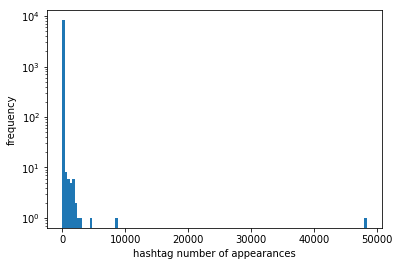

In [47]:
# number of times each hashtag appears
counts = flattened_hashtags_df.groupby(['hashtags']).size()\
                              .reset_index(name='counts')\
                              .counts

# define bins for histogram                              
my_bins = np.arange(0,counts.max()+400, 400)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+400, 400)
plt.xlabel('hashtag number of appearances')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

###  Number of Tweets tweeted based on Date

#### Spliting dat 

In [4]:
tweets['datetime'] = pd.to_datetime(tweets['datetime'])
tweets['Date'] = tweets['datetime'].dt.strftime('%d/%m/%Y')
tweets['Time'] = tweets['datetime'].dt.strftime('%H:%M')  ### Splitting the date and time columns

In [49]:
tweets.head()

datetime  is_reply  is_retweet  nbr_favorite  nbr_reply  \
0 2019-11-23 22:20:00  False     False       56            7           
1 2019-11-24 10:26:22  False     False       7             2           
2 2019-11-23 08:44:36  False     False       0             0           
3 2019-11-12 20:11:41  False     False       1             0           
4 2019-11-23 12:11:04  False     False       2             0           

   nbr_retweet  \
0  7             
1  2             
2  0             
3  0             
4  0             

                                                                                                                                                                                                                                                                                                                                        text  \
0  "It would all depend on what Sharad Pawar would choose to do. For example, if he says that these people have broken away from our party without my consent, then certainly the anti-defection law can apply." | @gaurav5173  \n\n#MaharashtraPolitics  \n\n https:// thewire.in/politics/mahar ashtra-sharad-pawar-floor-test-speaker   …   
1  Frustrated newspaper of India! \n\n#MaharashtraPolitics  #MahaMasterstroke  #ShivaSena pic.twitter.com/9bweznESEQ                                                                                                                                                                                                                           
2  # UddhavThackeray  Right now..\n#MaharashtraPolitics   pic.twitter.com/0VOBq8FHHb                                                                                                                                                                                                                                                           
3  Let's trend #AnjanaMaafiWapasLo  \n\nUrge @anjanaomkashyap  to take back her apology for calling Aaditya Thackeray Shiv Sena ka Rahul Gandhi. She was right about him. \n\nUse hashtag #AnjanaMaafiWapasLo  \n\n#presidentrule  \n#MaharashtraGovtFormation  \n#MaharashtraPolitics                                                         
4  Priya Dutt slams Congress for delaying decision\n#MaharashtraPolitics   https:// twitter.com/PriyaDutt_INC/ status/1198093222846681088   …                                                                                                                                                                                                  

     usernameTweet  len_message  \
0  thewire_in       43            
1  BhatChiru        8             
2  Northlate        6             
3  bjpbhaiyaa       30            
4  AfrozJournalist  12            

                                                                                                      hashtags  \
0  [#MaharashtraPolitics]                                                                                        
1  [#MaharashtraPolitics, #MahaMasterstroke, #ShivaSena]                                                         
2  [#MaharashtraPolitics]                                                                                        
3  [#AnjanaMaafiWapasLo, #AnjanaMaafiWapasLo, #presidentrule, #MaharashtraGovtFormation, #MaharashtraPolitics]   
4  [#MaharashtraPolitics]                                                                                        

         Date   Time  
0  23/11/2019  22:20  
1  24/11/2019  10:26  
2  23/11/2019  08:44  
3  12/11/2019  20:11  
4  23/11/2019  12:11

In [50]:
tweets['Date'].value_counts()   ### Number of tweets based on date 

23/11/2019    31969
12/11/2019    5597 
24/11/2019    5228 
11/11/2019    3437 
25/11/2019    2523 
22/11/2019    1397 
13/11/2019    888  
15/11/2019    404  
18/11/2019    299  
20/11/2019    250  
17/11/2019    249  
16/11/2019    244  
14/11/2019    241  
19/11/2019    171  
21/11/2019    171  
10/11/2019    68   
26/11/2019    47   
04/11/2019    38   
06/11/2019    33   
05/11/2019    32   
07/11/2019    17   
01/11/2019    12   
08/11/2019    11   
03/11/2019    10   
29/10/2019    4    
02/11/2019    3    
24/10/2019    2    
31/10/2019    2    
30/10/2019    2    
09/11/2019    2    
25/10/2019    1    
27/10/2019    1    
28/10/2019    1    
Name: Date, dtype: int64

### we can see that 23/11/2019 got more tweets beacuse on that day as  the central announce that there will be governer rule in the state because of non formation of government we can see that impact.

In [51]:
tweets['Time'].value_counts() ## number of tweets tweeted in paticular hour

09:17    159
09:33    158
09:27    158
09:20    158
09:07    157
09:30    157
09:25    157
09:31    155
09:06    155
09:24    155
09:22    151
09:32    150
09:23    149
09:02    149
09:16    148
09:28    148
09:08    145
09:04    141
09:21    140
09:15    140
09:45    140
09:14    139
09:19    138
09:29    138
09:38    138
09:12    138
09:50    138
10:07    137
10:09    137
09:58    137
09:35    136
09:49    135
09:40    135
09:57    135
09:26    134
09:39    134
09:36    134
10:05    133
09:34    132
09:51    132
09:13    132
10:02    132
09:00    132
10:01    132
10:14    131
10:00    131
09:53    131
10:50    130
09:10    130
09:46    129
09:05    127
09:42    127
09:11    126
09:59    126
10:27    126
11:02    124
09:41    123
09:03    123
09:09    123
10:19    122
10:15    122
09:18    122
09:56    121
10:52    121
09:01    121
09:54    120
09:48    120
11:03    118
10:53    118
09:52    118
10:20    117
09:47    117
10:51    116
10:06    116
10:11    115
10:22    115
10:16    115

### we can see that more tweets are tweeted in between 8am - 10am this is because of the as every day moring there will be some twist news or about the government formation so the people react more at that time


In [314]:
tweets['nbr_favorite'].value_counts

<bound method IndexOpsMixin.value_counts of 0        56   
1        7    
2        0    
3        1    
4        2    
5        5    
6        3    
7        0    
8        0    
9        0    
10       0    
11       0    
12       0    
13       0    
14       2    
15       4    
16       0    
17       0    
18       0    
19       1    
20       0    
21       1    
22       0    
23       0    
24       14   
25       0    
26       2    
27       4    
28       5    
29       2    
30       7    
31       0    
32       0    
33       0    
34       5    
35       4    
36       1    
37       4    
38       0    
39       0    
40       1    
41       1    
42       6    
43       10   
44       0    
45       15   
46       0    
47       1    
48       1    
49       2    
50       0    
51       1    
52       8    
53       539  
54       10   
55       0    
56       0    
57       0    
58       9    
59       1    
60       5    
61       2    
62       132  
63       0 

In [316]:
tweets['nbr_favorite'].describe() ## nbr favorite is the likes in twitter

count    53354.000000
mean     18.745230   
std      214.272513  
min      0.000000    
25%      0.000000    
50%      1.000000    
75%      3.000000    
max      23722.000000
Name: nbr_favorite, dtype: float64

### we can see that maximum likes is 23722 

Text(0.5, 1.0, ' Distribution of likes')

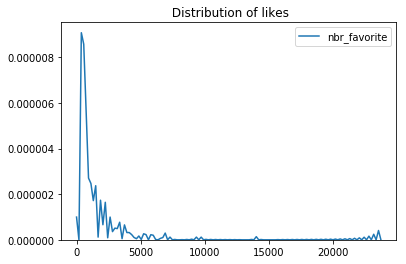

In [45]:
sns.kdeplot(tweets['nbr_favorite']).set_title(" Distribution of likes") ### distribution of likes

## Next we will clean the Tweet For our analysis

In [5]:
t1=tweets

In [6]:
t1.head(5)

ID            datetime has_media  is_reply  is_retweet  \
0  1198282561908346887 2019-11-23 22:20:00  True      False     False        
1  1198465358438338560 2019-11-24 10:26:22  NaN       False     False        
2  1198077360601350145 2019-11-23 08:44:36  NaN       False     False        
3  1194264004153290753 2019-11-12 20:11:41  NaN       False     False        
4  1198129320352333824 2019-11-23 12:11:04  NaN       False     False        

                        medias  nbr_favorite  nbr_reply  nbr_retweet  \
0  ['https://t.co/vFJhXB0CEQ']  56            7          7             
1  NaN                          7             2          2             
2  NaN                          0             0          0             
3  NaN                          1             0          0             
4  NaN                          2             0          0             

                                                                                                                                                                                                                                                                                                                                        text  \
0  "It would all depend on what Sharad Pawar would choose to do. For example, if he says that these people have broken away from our party without my consent, then certainly the anti-defection law can apply." | @gaurav5173  \n\n#MaharashtraPolitics  \n\n https:// thewire.in/politics/mahar ashtra-sharad-pawar-floor-test-speaker   …   
1  Frustrated newspaper of India! \n\n#MaharashtraPolitics  #MahaMasterstroke  #ShivaSena pic.twitter.com/9bweznESEQ                                                                                                                                                                                                                           
2  # UddhavThackeray  Right now..\n#MaharashtraPolitics   pic.twitter.com/0VOBq8FHHb                                                                                                                                                                                                                                                           
3  Let's trend #AnjanaMaafiWapasLo  \n\nUrge @anjanaomkashyap  to take back her apology for calling Aaditya Thackeray Shiv Sena ka Rahul Gandhi. She was right about him. \n\nUse hashtag #AnjanaMaafiWapasLo  \n\n#presidentrule  \n#MaharashtraGovtFormation  \n#MaharashtraPolitics                                                         
4  Priya Dutt slams Congress for delaying decision\n#MaharashtraPolitics   https:// twitter.com/PriyaDutt_INC/ status/1198093222846681088   …                                                                                                                                                                                                  

                                           url              user_id  \
0  /thewire_in/status/1198282561908346887       3150940290            
1  /BhatChiru/status/1198465358438338560        1152114081848913927   
2  /Northlate/status/1198077360601350145        799856224502067201    
3  /bjpbhaiyaa/status/1194264004153290753       190997072             
4  /AfrozJournalist/status/1198129320352333824  3194036948            

     usernameTweet        Date   Time  
0  thewire_in       23/11/2019  22:20  
1  BhatChiru        24/11/2019  10:26  
2  Northlate        23/11/2019  08:44  
3  bjpbhaiyaa       12/11/2019  20:11  
4  AfrozJournalist  23/11/2019  12:11

In [7]:
import re
import string# to remove punctuations
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
def clean_text(text):
    ps=PorterStemmer()
    text1 = re.sub(r'^https?:\/\/.*[\r\n]*', '', text)
    print(text1)
    text_cleaned=" ".join([x for x in text1 if x not in string.punctuation])
    print(text_cleaned)
    text_cleaned=text_cleaned.lower()
    print(text_cleaned)
    text_cleaned=text_cleaned.split(" ")
    print(text_cleaned)
    text_tokens=[token for token in text_cleaned if token not in STOPWORDS]
    stem_words=[ps.stem(stem) for stem in text_tokens ]
    text=" ".join(stem_words)
    text_cleaned=re.sub(' +',' ',text)
    return text_cleaned      ## cleaning the data 

In [8]:
t1['cleaned']=t1['text'].apply(lambda x:re.sub('http.*',' ',x))

In [9]:
t1['cleaned']=t1['cleaned'].apply(lambda x:re.sub("\s+"," ",x)) ## removing the \n in the data 

In [10]:
t1['cleaned'].head(5)

0    "It would all depend on what Sharad Pawar would choose to do. For example, if he says that these people have broken away from our party without my consent, then certainly the anti-defection law can apply." | @gaurav5173 #MaharashtraPolitics              
1    Frustrated newspaper of India! #MaharashtraPolitics #MahaMasterstroke #ShivaSena pic.twitter.com/9bweznESEQ                                                                                                                                                   
2    # UddhavThackeray Right now.. #MaharashtraPolitics pic.twitter.com/0VOBq8FHHb                                                                                                                                                                                 
3    Let's trend #AnjanaMaafiWapasLo Urge @anjanaomkashyap to take back her apology for calling Aaditya Thackeray Shiv Sena ka Rahul Gandhi. She was right about him. Use hashtag #AnjanaMaafiWapasLo #presidentrule #Mahara

In [57]:
t1['cleaned'].tolist()

['"It would all depend on what Sharad Pawar would choose to do. For example, if he says that these people have broken away from our party without my consent, then certainly the anti-defection law can apply." | @gaurav5173 #MaharashtraPolitics ',
 'Frustrated newspaper of India! #MaharashtraPolitics #MahaMasterstroke #ShivaSena pic.twitter.com/9bweznESEQ',
 '# UddhavThackeray Right now.. #MaharashtraPolitics pic.twitter.com/0VOBq8FHHb',
 "Let's trend #AnjanaMaafiWapasLo Urge @anjanaomkashyap to take back her apology for calling Aaditya Thackeray Shiv Sena ka Rahul Gandhi. She was right about him. Use hashtag #AnjanaMaafiWapasLo #presidentrule #MaharashtraGovtFormation #MaharashtraPolitics",
 'Priya Dutt slams Congress for delaying decision #MaharashtraPolitics ',
 'Politics mein koi kisi ka dushman nahi hota hai. Ideologies are secondary. It’s amazing how my of us get fooled, fight and get into heated debates drawing lines of left, right and centre categorising each other but at the end

In [53]:
t1['cleaned'] = t1['cleaned'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE) ## removing emojis in data

In [54]:
t1['cleaned'] = t1['cleaned'].replace('\.','', regex=True) ## removing the \,.,spaces in data

In [55]:
t1['cleaned'].head()

0    It would all depend on what Sharad Pawar would choose to do For example, if he says that these people have broken away from our party without my consent, then certainly the anti-defection law can apply  @gaurav5173 #MaharashtraPolitics                
1    Frustrated newspaper of India #MaharashtraPolitics #MahaMasterstroke #ShivaSena pictwittercom/9bweznESEQ                                                                                                                                                   
2    # UddhavThackeray Right now #MaharashtraPolitics pictwittercom/0VOBq8FHHb                                                                                                                                                                                  
3    Lets trend #AnjanaMaafiWapasLo Urge @anjanaomkashyap to take back her apology for calling Aaditya Thackeray Shiv Sena ka Rahul Gandhi She was right about him Use hashtag #AnjanaMaafiWapasLo #presidentrule #MaharashtraGovtFor

In [56]:
t1['cleaned']=t1['cleaned'].apply(lambda cleaned_review:"".join([x for x in cleaned_review if x not in string.punctuation]))

In [57]:
t1['cleaned'].head()

0    It would all depend on what Sharad Pawar would choose to do For example if he says that these people have broken away from our party without my consent then certainly the antidefection law can apply  gaurav5173 MaharashtraPolitics               
1    Frustrated newspaper of India MaharashtraPolitics MahaMasterstroke ShivaSena pictwittercom9bweznESEQ                                                                                                                                                 
2     UddhavThackeray Right now MaharashtraPolitics pictwittercom0VOBq8FHHb                                                                                                                                                                               
3    Lets trend AnjanaMaafiWapasLo Urge anjanaomkashyap to take back her apology for calling Aaditya Thackeray Shiv Sena ka Rahul Gandhi She was right about him Use hashtag AnjanaMaafiWapasLo presidentrule MaharashtraGovtFormation MaharashtraPolit

In [58]:
import string
def removePunct(text):
    text = text.translate(str.maketrans({key: " {0} ".format(key) for key in string.punctuation}))
    
    text_cleaned="".join([x for x in text if x not in string.punctuation])
    text_cleaned=re.sub(r'[^\x00-\x7F]+',' ', text_cleaned) ## Remove Ascii Characters
    text_cleaned=re.sub('\s+', ' ', text_cleaned).strip()
    return text_cleaned

In [59]:
t1['cleaned']=t1['cleaned'].apply(lambda x:removePunct(x))
t1.head()

datetime  is_reply  is_retweet  nbr_favorite  nbr_reply  \
0 2019-11-23 22:20:00  False     False       56            7           
1 2019-11-24 10:26:22  False     False       7             2           
2 2019-11-23 08:44:36  False     False       0             0           
3 2019-11-12 20:11:41  False     False       1             0           
4 2019-11-23 12:11:04  False     False       2             0           

   nbr_retweet  \
0  7             
1  2             
2  0             
3  0             
4  0             

                                                                                                                                                                                                                                                                                                                                        text  \
0  "It would all depend on what Sharad Pawar would choose to do. For example, if he says that these people have broken away from our party without my consent, then certainly the anti-defection law can apply." | @gaurav5173  \n\n#MaharashtraPolitics  \n\n https:// thewire.in/politics/mahar ashtra-sharad-pawar-floor-test-speaker   …   
1  Frustrated newspaper of India! \n\n#MaharashtraPolitics  #MahaMasterstroke  #ShivaSena pic.twitter.com/9bweznESEQ                                                                                                                                                                                                                           
2  # UddhavThackeray  Right now..\n#MaharashtraPolitics   pic.twitter.com/0VOBq8FHHb                                                                                                                                                                                                                                                           
3  Let's trend #AnjanaMaafiWapasLo  \n\nUrge @anjanaomkashyap  to take back her apology for calling Aaditya Thackeray Shiv Sena ka Rahul Gandhi. She was right about him. \n\nUse hashtag #AnjanaMaafiWapasLo  \n\n#presidentrule  \n#MaharashtraGovtFormation  \n#MaharashtraPolitics                                                         
4  Priya Dutt slams Congress for delaying decision\n#MaharashtraPolitics   https:// twitter.com/PriyaDutt_INC/ status/1198093222846681088   …                                                                                                                                                                                                  

     usernameTweet  len_message  \
0  thewire_in       43            
1  BhatChiru        8             
2  Northlate        6             
3  bjpbhaiyaa       30            
4  AfrozJournalist  12            

                                                                                                      hashtags  \
0  [#MaharashtraPolitics]                                                                                        
1  [#MaharashtraPolitics, #MahaMasterstroke, #ShivaSena]                                                         
2  [#MaharashtraPolitics]                                                                                        
3  [#AnjanaMaafiWapasLo, #AnjanaMaafiWapasLo, #presidentrule, #MaharashtraGovtFormation, #MaharashtraPolitics]   
4  [#MaharashtraPolitics]                                                                                        

         Date   Time  \
0  23/11/2019  22:20   
1  24/11/2019  10:26   
2  23/11/2019  08:44   
3  12/11/2019  20:11   
4  23/11/2019  12:11   

                                                                                                                                                                                                                                                 cleaned  
0  It would all depend on what Sharad Pawar would choose to do For example if he says that these people have broken away from our party without my consent then ce

### Sentiment analysis using the vaderSentiment

In [78]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [79]:
# DEFINING A FUNCTION TO UNDERSTAND THE SENTENCE SCORE FOR EACH WORD IN A SENTENCE
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    #print(score)
    return score
    #print("{:-<40} {}".format(sentence, str(score)))

In [80]:
# Here defining the compound score
def compound_score(text):
    sc=sentiment_analyzer_scores(text)
    return sc['compound']

In [81]:
## giving compund score for each column
t1['comp_score']=t1['cleaned'].apply(lambda x:compound_score(x))

In [82]:
t1.sample(5)

datetime  is_reply  is_retweet  nbr_favorite  nbr_reply  \
47570 2019-11-23 10:57:57  False     False       12            0           
49726 2019-11-23 22:38:43  False     False       21            0           
5150  2019-11-23 22:47:53  False     False       0             0           
32228 2019-11-23 12:10:15  True      False       2             0           
5248  2019-11-23 15:04:18  False     False       1             0           

       nbr_retweet  \
47570  1             
49726  2             
5150   0             
32228  0             
5248   0             

                                                                                                                                                                                                                                                                                                                              text  \
47570  LIVE | "Which direction are we taking democracy to?" questioned Rajasthan CM Ashok Gehlot.\nFollow for updates on #MaharashtraPolitics :\n https://www. thequint.com/news/politics/ maharashtra-government-formation-elections-shiv-sena-bjp-uddhav-thackeray-sharad-pawar-ncp-sonia-gandhi-congress-live-updates   …         
49726  # MaharashtraPolitics  | The overnight political development does not seem to have gone well with the youngster\n\n#MaharashtraGovermentFormation https:// mumbaimirror.indiatimes.com/news/india/tel ugu-political-parties-silent-on-maharashtra-politics-youth-unhappy-with-dawn-development/articleshow/72202353.cms   …   
5150   After all #MaharashtraPolitics  drama today it seems like the script is moving according to #SharadPawar  , now he is in a position of making CM in #Maharashtra  from his party. \nHe played a well planned #MahaMasterstroke  and now pressure is on  #Congress  & #ShivaSena  .                                            
32228  Arnab while watching the development in #MaharashtraPolitics  ..\n        pic.twitter.com/1g9XGOz2Gk                                                                                                                                                                                                                          
5248   If we are respecting @narendramodi  and @AmitShah  for selecting a 25000cr scam accused as Deputy CM then we are real Anti-Nationals!!\n#MaharashtraPolitics  #Motabhai                                                                                                                                                       

         usernameTweet  len_message  \
47570  TheQuint         24            
49726  MumbaiMirror     22            
5150   iabhishektyagi   45            
32228  _TheMask__       9             
5248   SanketA19775699  23            

                                                                                           hashtags  \
47570  [#MaharashtraPolitics]                                                                         
49726  [#MaharashtraGovermentFormation]                                                               
5150   [#MaharashtraPolitics, #SharadPawar, #Maharashtra, #MahaMasterstroke, #Congress, #ShivaSena]   
32228  [#MaharashtraPolitics]                                                                         
5248   [#MaharashtraPolitics, #Motabhai]                                                              

             Date   Time  \
47570  23/11/2019  10:57   
49726  23/11/2019  22:38   
5150   23/11/2019  22:47   
32228  23/11/2019  12:10   
5248   23/11/2019  15:04   

                                                                                                                                                                                                                                                            cleaned  \
47570  LIVE Which direction are we taking democracy to questioned Rajasthan CM Ashok Gehlot Follow for updates on MaharashtraPolitics                                                   

In [83]:
def emotion(score):
    if score>0.5:
        return "positive"
    if score<0.5:
        return "negative"
    if score==0.5:
        return "neutral"  ## giving the score that above o.5 is positive or else negative

In [84]:
t1['sentiment']=t1['comp_score'].apply(lambda x:emotion(x)) 

In [85]:
t1.sample(5)

datetime  is_reply  is_retweet  nbr_favorite  nbr_reply  \
857   2019-11-23 09:49:08  True      False       0             0           
11453 2019-11-23 12:19:42  False     False       0             0           
27895 2019-11-23 21:25:54  False     False       1             0           
1608  2019-11-11 22:22:32  False     False       1             1           
48306 2019-11-23 11:16:30  False     False       3             0           

       nbr_retweet  \
857    0             
11453  0             
27895  0             
1608   0             
48306  0             

                                                                                                                                                                                                                                                                                                                                             text  \
857    Remember the Name. \nAmit Anilchandra Shah.\n#MaharashtraPolitics  \n#DevendraFadnavis pic.twitter.com/D9gGz0YKWP                                                                                                                                                                                                                            
11453  One thing is clear on #MaharashtraPolitics  #MaharastraPoliticalCrisis  #MaharashtraGovtFormation  \n\nModi-Shah era of BJP is golden era for the party and country... no more soft touch on enemies like ABV...                                                                                                                             
27895  "Bright" future of Maharashtra born in the darkness of ugly night? Wah Modi ji Wah you always work in shadow of dark. #MaharashtraCM  #MahaMasterstroke  #MaharashtraGovtFormation  #DevendraFadnavis  #AjithPawar  #MaharashtraPolitics  #Motabhai  #MotaBhaiRocks https:// twitter.com/narendramodi/s tatus/1198070368478515201?s=19   …   
1608   # MaharashtraPolitics  all set to go sharad pawar has been invited and if so he will form government with support from bjp !  Prediction                                                                                                                                                                                                     
48306  True Colors looking great here #MaharashtraPolitics   https:// twitter.com/twitter/status /1197682415667421184   …                                                                                                                                                                                                                           

         usernameTweet  len_message  \
857    Viivekanand0063  9             
11453  kshatriyahindu   28            
27895  pnavadgi         34            
1608   salimbodla       24            
48306  myownhealer      10            

                                                                                                                                              hashtags  \
857    [#MaharashtraPolitics, #DevendraFadnavis]                                                                                                         
11453  [#MaharashtraPolitics, #MaharastraPoliticalCrisis, #MaharashtraGovtFormation]                                                                     
27895  [#MaharashtraCM, #MahaMasterstroke, #MaharashtraGovtFormation, #DevendraFadnavis, #AjithPawar, #MaharashtraPolitics, #Motabhai, #MotaBhaiRocks]   
1608   []                                                                                                                                                
48306  [#MaharashtraPolitics]                                                                                                                            

             Date   Time  \
857    23/11/2019  09:49   
11453  23/11/2019  12:19   
27895  23/11/2019  21:25   
1608   11/11/2019  22:22   
48306  23/11/2019  11:16   

                                                   

In [86]:
from collections import Counter 

In [87]:
import seaborn as sns

Text(0.5, 1.0, 'Distribution of sentiment')

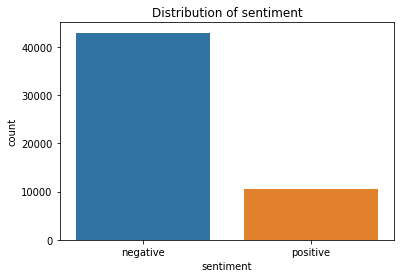

In [88]:
sns.countplot(t1['sentiment']).set_title("Distribution of sentiment")

### We can say that there are more negative tweets than positive by above countplot

In [319]:
tweets['Time'] = tweets['datetime'].dt.strftime('%H')

In [332]:
tweets['time'] = tweets['time'].apply(lambda x:float(x))
tweets['time']

0        22.0
1        10.0
2        8.0 
3        20.0
4        12.0
5        12.0
6        22.0
7        10.0
8        12.0
9        14.0
10       12.0
11       9.0 
12       8.0 
13       9.0 
14       12.0
15       23.0
16       12.0
17       13.0
18       19.0
19       8.0 
20       10.0
21       22.0
22       1.0 
23       9.0 
24       11.0
25       22.0
26       10.0
27       10.0
28       13.0
29       17.0
30       9.0 
31       9.0 
32       16.0
33       20.0
34       11.0
35       10.0
36       14.0
37       9.0 
38       8.0 
39       9.0 
40       22.0
41       9.0 
42       12.0
43       10.0
44       11.0
45       11.0
46       20.0
47       11.0
48       10.0
49       13.0
50       14.0
51       13.0
52       12.0
53       20.0
54       9.0 
55       8.0 
56       8.0 
57       8.0 
58       10.0
59       11.0
60       9.0 
61       22.0
62       21.0
63       9.0 
64       21.0
65       22.0
66       11.0
67       14.0
68       20.0
69       1.0 
70       17.0
71    

### sentence vary by time

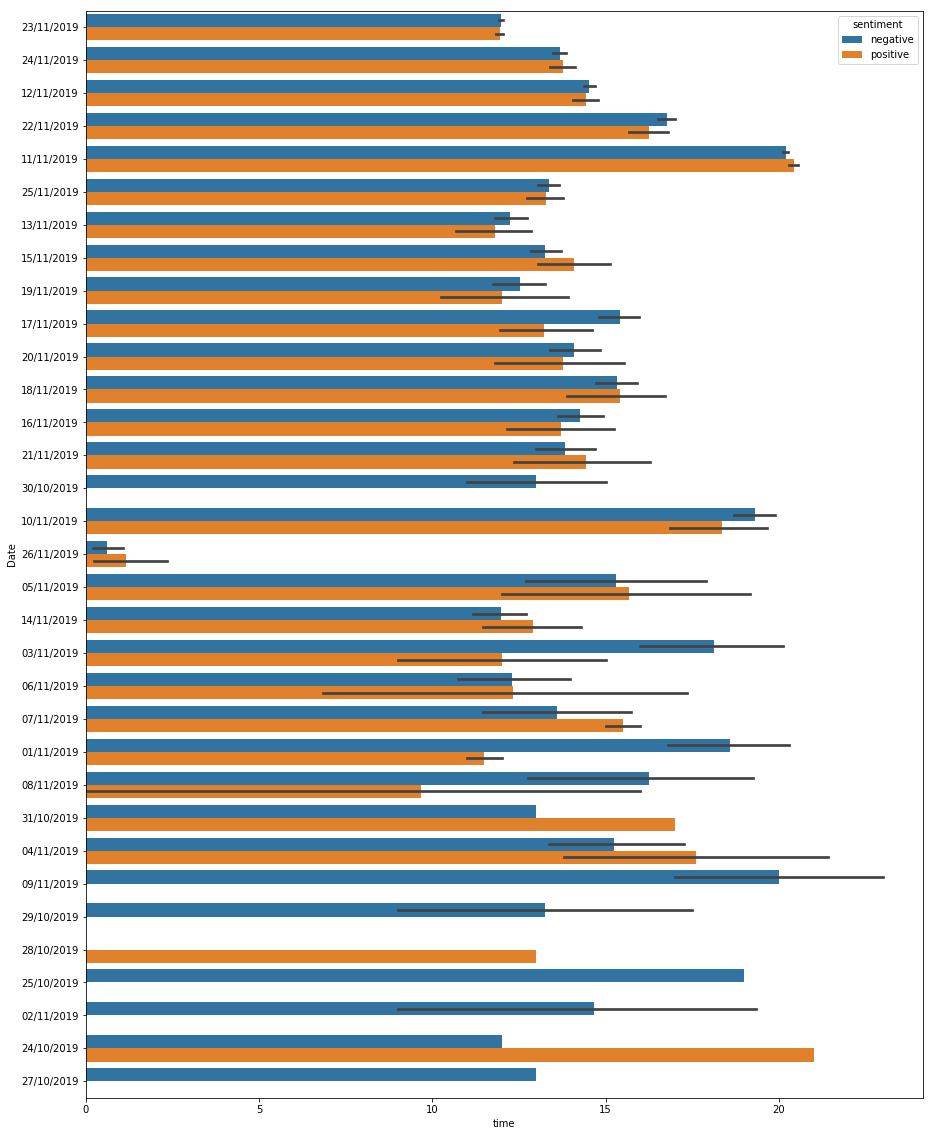

In [334]:
sns.barplot(y='Date', x='time',hue='sentiment',data=tweets)

### from the above we can say that on 24thoct at 9pm there is more positive tweets as that is election reslut time would have more tweets at that time and on the 11th october they are having same as both positive and negative as there is fight between the both bjp and congress party who will form the party. at the time sivasena supported congress thats why more tweets happend at that time

### Let us now look at what are the common words used in positive and negative reviews

In [89]:
from collections import Counter 

In [90]:
positive_tweety=t1.loc[t1['sentiment']=='positive','cleaned'].tolist()
positive_tweety[0:5]

['Politics mein koi kisi ka dushman nahi hota hai Ideologies are secondary Its amazing how my of us get fooled fight and get into heated debates drawing lines of left right and centre categorising each other but at the end power wins FacePalm MaharashtraPolitics',
 'Politics can be the best traded stock on NSE MaharashtraPolitics',
 'Who is The looser of the day The winner of the day MaharashtraPolitics',
 'What just happened in Maharashtra is really unpredictable but anyway congratulations DevFadnavis for becoming CM of MaharashtraPolitics with NCP narendramodi AmitShah both are the real chankyas behind it ajitpawar SaturdayMotivation SaturdayMorning',
 'If goal of people is better India People should learn to treat political parties leaders like tissue papers We shud dispose dem as they dispose us ideologies 2 b in power parties and leaders cause a mess like MaharashtraElections2019 MaharashtraPolitics JaiHind']

In [91]:
negative_tweety=t1.loc[t1['sentiment']=='negative','cleaned'].tolist()
negative_tweety[0:5]

['It would all depend on what Sharad Pawar would choose to do For example if he says that these people have broken away from our party without my consent then certainly the antidefection law can apply gaurav5173 MaharashtraPolitics',
 'Frustrated newspaper of India MaharashtraPolitics MahaMasterstroke ShivaSena pictwittercom9bweznESEQ',
 'UddhavThackeray Right now MaharashtraPolitics pictwittercom0VOBq8FHHb',
 'Lets trend AnjanaMaafiWapasLo Urge anjanaomkashyap to take back her apology for calling Aaditya Thackeray Shiv Sena ka Rahul Gandhi She was right about him Use hashtag AnjanaMaafiWapasLo presidentrule MaharashtraGovtFormation MaharashtraPolitics',
 'Priya Dutt slams Congress for delaying decision MaharashtraPolitics']

### Tokenise the words and use Counter to keep count of words

In [92]:
def getMostCommon(cleaned,topn=20):
    tweety=" ".join(cleaned)
    tokenised_tweety=tweety.split(" ")
    
    
    freq_counter=Counter(tokenised_tweety)
    return freq_counter.most_common(topn)

In [93]:
top_20_positive_tweets_words=getMostCommon(positive_tweety,20)

In [94]:
top_20_positive_tweets_words ## common positive words

[('MaharashtraPolitics', 10305),
 ('the', 7403),
 ('to', 5965),
 ('of', 5122),
 ('in', 4069),
 ('is', 4002),
 ('and', 3817),
 ('a', 3010),
 ('for', 2867),
 ('Maharashtra', 2597),
 ('BJP', 1838),
 ('MaharashtraGovtFormation', 1622),
 ('on', 1584),
 ('will', 1552),
 ('be', 1451),
 ('with', 1436),
 ('NCP', 1399),
 ('that', 1333),
 ('I', 1313),
 ('as', 1273)]

In [95]:
top_20_negative_tweets_words=getMostCommon(negative_tweety,20)

In [96]:
top_20_negative_tweets_words ## common negative tweeted words

[('MaharashtraPolitics', 42279),
 ('the', 20530),
 ('to', 16443),
 ('of', 15284),
 ('in', 13918),
 ('is', 13263),
 ('and', 10190),
 ('Maharashtra', 8832),
 ('a', 8619),
 ('MaharashtraGovtFormation', 7355),
 ('for', 7035),
 ('BJP', 6105),
 ('NCP', 5221),
 ('be', 4969),
 ('on', 4659),
 ('will', 4521),
 ('with', 4500),
 ('this', 4302),
 ('Pawar', 3915),
 ('that', 3821)]

In [97]:
neg_words=[val[0] for val in top_20_negative_tweets_words]
pos_words=[val[0] for val in top_20_positive_tweets_words]

set(neg_words) - set(pos_words)

{'Pawar', 'this'}

In [98]:
set(pos_words) - set(neg_words) ## other than positive and negative words

{'I', 'as'}

### Unigram ### unigram is that it takes single word and shows sentiment for single word but actually we cant find the more sentiment in the unigram

In [99]:
def plotMostCommonWords(cleaned,topn=50,title="Positive tweet",color="blue",axis=None):
    top_words=getMostCommon(cleaned,topn=topn)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))

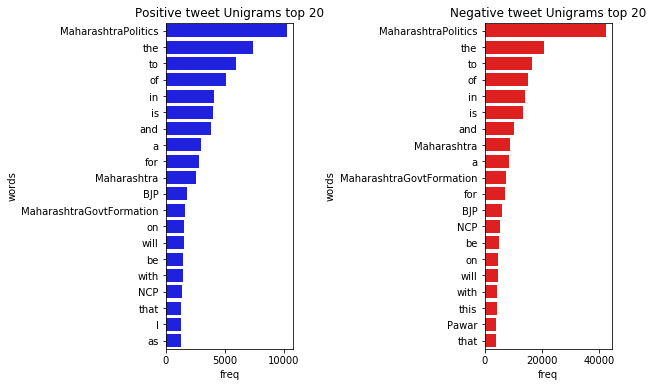

In [100]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 8,6 ## Sets the heigth and width of image


fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=1.5) #Adjusts the space between the two plots
plotMostCommonWords(positive_tweety,20,"Positive tweet Unigrams",axis=ax[0])

plotMostCommonWords(negative_tweety,20,"Negative tweet Unigrams",color="red",axis=ax[1])

### Bi-Gram ### bigram is that it takes two word that analyse the more sentimemt that unigram

In [101]:
def generateNGram(text,n=2):
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams]

In [102]:
positive_tweets_bigrams=[" ".join(generateNGram(cleaned)) for cleaned in positive_tweety]
negative_tweets_bigrams=[" ".join(generateNGram(cleaned)) for cleaned in negative_tweety]

In [103]:
positive_tweets_bigrams[0:5]

['Politics_mein mein_koi koi_kisi kisi_ka ka_dushman dushman_nahi nahi_hota hota_hai hai_Ideologies Ideologies_are are_secondary secondary_Its Its_amazing amazing_how how_my my_of of_us us_get get_fooled fooled_fight fight_and and_get get_into into_heated heated_debates debates_drawing drawing_lines lines_of of_left left_right right_and and_centre centre_categorising categorising_each each_other other_but but_at at_the the_end end_power power_wins wins_FacePalm FacePalm_MaharashtraPolitics',
 'Politics_can can_be be_the the_best best_traded traded_stock stock_on on_NSE NSE_MaharashtraPolitics',
 'Who_is is_The The_looser looser_of of_the the_day day_The The_winner winner_of of_the the_day day_MaharashtraPolitics',
 'What_just just_happened happened_in in_Maharashtra Maharashtra_is is_really really_unpredictable unpredictable_but but_anyway anyway_congratulations congratulations_DevFadnavis DevFadnavis_for for_becoming becoming_CM CM_of of_MaharashtraPolitics MaharashtraPolitics_with wi

In [104]:
top_20_positive_bigrams=getMostCommon(positive_tweets_bigrams,topn=20)
top_20_positive_bigrams

[('MaharashtraPolitics_MaharashtraGovtFormation', 743),
 ('of_Maharashtra', 647),
 ('of_the', 576),
 ('in_Maharashtra', 572),
 ('in_the', 503),
 ('Shiv_Sena', 502),
 ('Supreme_Court', 419),
 ('is_the', 417),
 ('MaharashtraGovtFormation_MaharashtraPolitics', 377),
 ('the_best', 376),
 ('Sharad_Pawar', 366),
 ('will_be', 353),
 ('to_form', 352),
 ('for_the', 350),
 ('to_be', 322),
 ('oath_as', 308),
 ('CM_of', 300),
 ('Ajit_Pawar', 294),
 ('Maharashtra_MaharashtraPolitics', 276),
 ('in_MaharashtraPolitics', 271)]

In [105]:
top_20_negative_bigrams=getMostCommon(negative_tweets_bigrams,topn=20)
top_20_negative_bigrams

[('MaharashtraPolitics_MaharashtraGovtFormation', 3277),
 ('in_Maharashtra', 2595),
 ('Shiv_Sena', 2110),
 ('MaharashtraGovtFormation_MaharashtraPolitics', 1803),
 ('in_the', 1613),
 ('of_the', 1553),
 ('Sharad_Pawar', 1523),
 ('Ajit_Pawar', 1462),
 ('Maharashtra_MaharashtraPolitics', 1271),
 ('will_be', 1265),
 ('is_the', 1212),
 ('Amit_Shah', 1200),
 ('to_form', 1174),
 ('of_Maharashtra', 1162),
 ('to_be', 1123),
 ('MaharashtraPolitics_MaharashtraPoliticalCrisis', 1068),
 ('This_is', 1014),
 ('in_MaharashtraPolitics', 1004),
 ('Sanjay_Raut', 985),
 ('MaharashtraPolitics_Maharashtra', 840)]

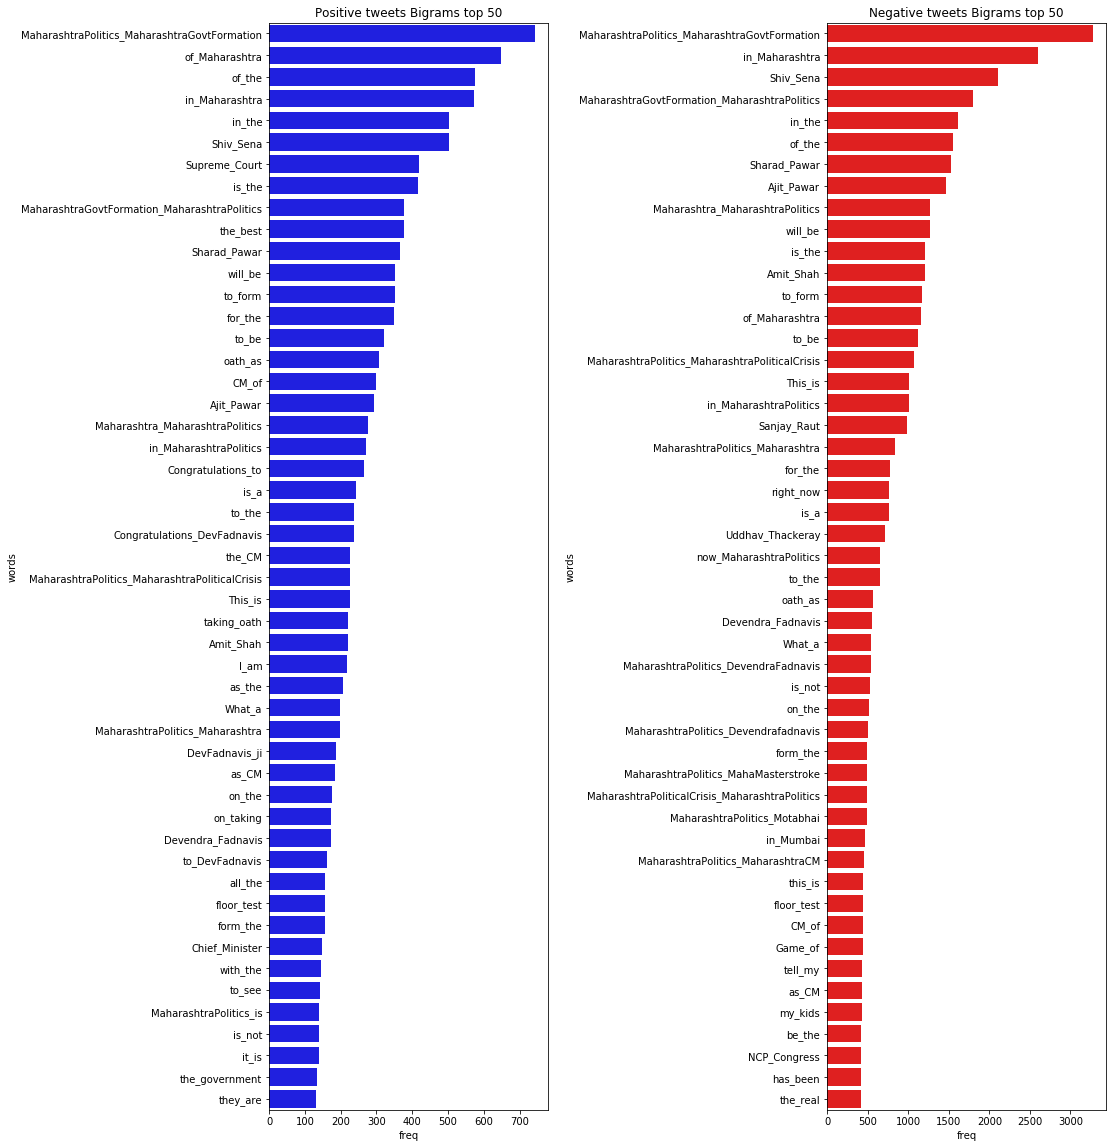

In [106]:
rcParams['figure.figsize'] = 15,20
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=1) #Adjusts the space between the two plots
plotMostCommonWords(positive_tweets_bigrams,50,"Positive tweets Bigrams",axis=ax[0])

plotMostCommonWords(negative_tweets_bigrams,50,"Negative tweets Bigrams",color="red",axis=ax[1])

### Tri-Gram   ##

In [107]:
def generateNGram(text,n=3):
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams]

In [108]:
positive_tweets_trigrams=[" ".join(generateNGram(cleaned)) for cleaned in positive_tweety]
negative_tweets_trigrams=[" ".join(generateNGram(cleaned)) for cleaned in negative_tweety]

In [109]:
top_20_positive_trigrams=getMostCommon(positive_tweets_trigrams,topn=20)
top_20_positive_trigrams

[('CM_of_Maharashtra', 266),
 ('taking_oath_as', 209),
 ('on_taking_oath', 169),
 ('oath_as_the', 125),
 ('as_the_CM', 112),
 ('oath_as_CM', 101),
 ('to_form_the', 101),
 ('tell_my_kids', 99),
 ('Deputy_CM_of', 89),
 ('people_of_Maharashtra', 86),
 ('Congratulations_to_DevFadnavis', 83),
 ('Gonna_tell_my', 83),
 ('Chief_Minister_of', 82),
 ('is_the_best', 77),
 ('Minister_of_Maharashtra', 76),
 ('CM_and_Deputy', 75),
 ('ji_on_taking', 75),
 ('to_form_government', 75),
 ('government_in_Maharashtra', 75),
 ('and_Deputy_CM', 74)]

In [110]:
top_20_negative_trigrams=getMostCommon(negative_tweets_trigrams,topn=20)
top_20_negative_trigrams

[('in_Maharashtra_MaharashtraPolitics', 544),
 ('tell_my_kids', 412),
 ('right_now_MaharashtraPolitics', 368),
 ('Gonna_tell_my', 335),
 ('to_form_the', 310),
 ('CM_of_Maharashtra', 303),
 ('to_form_government', 287),
 ('Game_of_Thrones', 271),
 ('government_in_Maharashtra', 256),
 ('form_the_government', 237),
 ('to_form_govt', 227),
 ('takes_oath_as', 225),
 ('oath_as_CM', 212),
 ('MaharashtraPolitics_MaharashtraGovtFormation_Maharashtra', 193),
 ('This_is_what', 185),
 ('in_the_state', 181),
 ('Amit_Shah_MaharashtraPolitics', 169),
 ('rule_in_Maharashtra', 169),
 ('was_played_in', 163),
 ('', 162)]

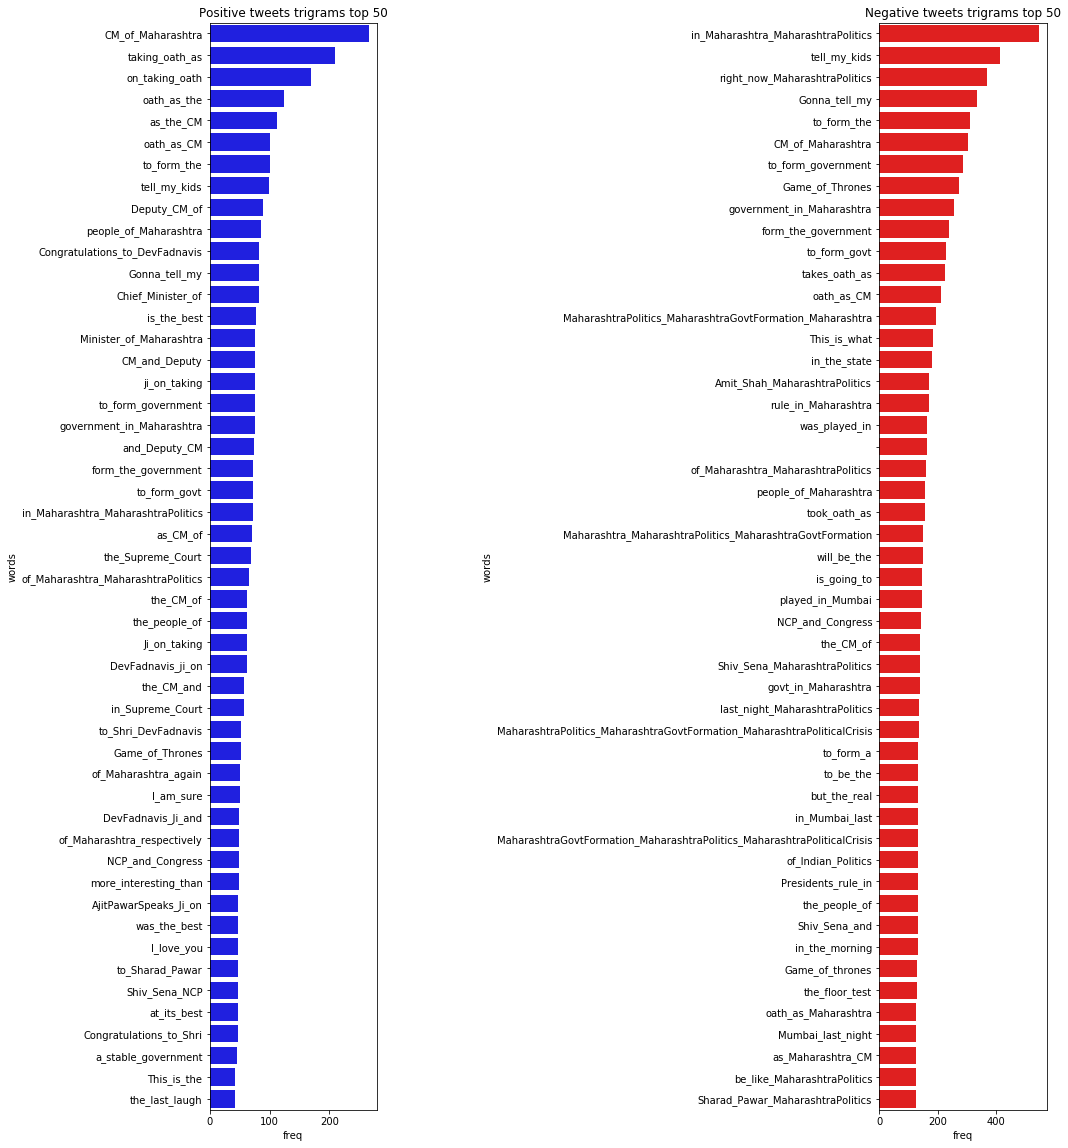

In [111]:
rcParams['figure.figsize'] = 15,20
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=3) #Adjusts the space between the two plots
plotMostCommonWords(positive_tweets_trigrams,50,"Positive tweets trigrams",axis=ax[0])

plotMostCommonWords(negative_tweets_trigrams,50,"Negative tweets trigrams",color="red",axis=ax[1])

### Let us first tokenise the words and remove stopwords and punctuations. and find the number of clusters by the elbow method

In [117]:
# load all necessary libraries
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

pd.set_option('max_colwidth', 100)

In [200]:
import string
from nltk.corpus import stopwords
from nltk import PorterStemmer as Stemmer

In [118]:
t6.head()

datetime  is_reply  is_retweet  nbr_favorite  nbr_reply  \
0 2019-11-23 22:20:00  False     False       56            7           
1 2019-11-24 10:26:22  False     False       7             2           
2 2019-11-23 08:44:36  False     False       0             0           
3 2019-11-12 20:11:41  False     False       1             0           
4 2019-11-23 12:11:04  False     False       2             0           

   nbr_retweet  \
0  7             
1  2             
2  0             
3  0             
4  0             

                                                                                                                                                                                                                                                                                                                                        text  \
0  "It would all depend on what Sharad Pawar would choose to do. For example, if he says that these people have broken away from our party without my consent, then certainly the anti-defection law can apply." | @gaurav5173  \n\n#MaharashtraPolitics  \n\n https:// thewire.in/politics/mahar ashtra-sharad-pawar-floor-test-speaker   …   
1  Frustrated newspaper of India! \n\n#MaharashtraPolitics  #MahaMasterstroke  #ShivaSena pic.twitter.com/9bweznESEQ                                                                                                                                                                                                                           
2  # UddhavThackeray  Right now..\n#MaharashtraPolitics   pic.twitter.com/0VOBq8FHHb                                                                                                                                                                                                                                                           
3  Let's trend #AnjanaMaafiWapasLo  \n\nUrge @anjanaomkashyap  to take back her apology for calling Aaditya Thackeray Shiv Sena ka Rahul Gandhi. She was right about him. \n\nUse hashtag #AnjanaMaafiWapasLo  \n\n#presidentrule  \n#MaharashtraGovtFormation  \n#MaharashtraPolitics                                                         
4  Priya Dutt slams Congress for delaying decision\n#MaharashtraPolitics   https:// twitter.com/PriyaDutt_INC/ status/1198093222846681088   …                                                                                                                                                                                                  

     usernameTweet  len_message  \
0  thewire_in       43            
1  BhatChiru        8             
2  Northlate        6             
3  bjpbhaiyaa       30            
4  AfrozJournalist  12            

                                                                                                      hashtags  \
0  [#MaharashtraPolitics]                                                                                        
1  [#MaharashtraPolitics, #MahaMasterstroke, #ShivaSena]                                                         
2  [#MaharashtraPolitics]                                                                                        
3  [#AnjanaMaafiWapasLo, #AnjanaMaafiWapasLo, #presidentrule, #MaharashtraGovtFormation, #MaharashtraPolitics]   
4  [#MaharashtraPolitics]                                                                                        

         Date   Time  \
0  23/11/2019  22:20   
1  24/11/2019  10:26   
2  23/11/2019  08:44   
3  12/11/2019  20:11   
4  23/11/2019  12:11   

                                                                                                                                                                                                                                                 cleaned  \
0  It would all depend on what Sharad Pawar would choose to do For example if he says that these people have broken away from our party without my consent then c

In [119]:
STOPWORDS=stopwords.words("english")

In [120]:
STOPWORDS

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [121]:
test_doc="It would all depend on what Sharad Pawar would choose to do For example if he says that these pe"
## Remove punctuation
test_doc_cleaned="".join([x for x in test_doc if x not in string.punctuation])
test_doc_cleaned

'It would all depend on what Sharad Pawar would choose to do For example if he says that these pe'

In [122]:
## Lower case all words
test_doc_cleaned=test_doc_cleaned.lower()
test_doc_cleaned

'it would all depend on what sharad pawar would choose to do for example if he says that these pe'

In [123]:
## Let us remove the stopwords
test_tokens=test_doc_cleaned.split(" ")
test_tokens=[token for token in test_tokens if token not in STOPWORDS]
test_tokens

['would',
 'depend',
 'sharad',
 'pawar',
 'would',
 'choose',
 'example',
 'says',
 'pe']

In [124]:
## Stem the words
from nltk.stem import PorterStemmer
ps = PorterStemmer() 
test_doc_cleaned=" ".join([ps.stem(token) for token in test_tokens])
test_doc_cleaned

'would depend sharad pawar would choos exampl say pe'

In [125]:
import string   
import re

def clean_text(text):
    ps=PorterStemmer()
    text = text.translate(str.maketrans({key: " {0} ".format(key) for key in string.punctuation}))
    #remove extra white space
    
    text_cleaned="".join([x for x in text if x not in string.punctuation])
    
    text_cleaned=re.sub(' +', ' ', text_cleaned)
    text_cleaned=text_cleaned.lower()
    tokens=text_cleaned.split(" ")
    tokens=[token for token in tokens if token not in STOPWORDS]
    text_cleaned=" ".join([ps.stem(token) for token in tokens])
    
    
    return text_cleaned


print(clean_text(test_doc))

#### function for the stemming the    
    

would depend sharad pawar would choos exampl say pe


In [126]:
t6['cleaned_tweets']=t6['cleaned'].apply(lambda x:clean_text(x))
t6.head()

datetime  is_reply  is_retweet  nbr_favorite  nbr_reply  \
0 2019-11-23 22:20:00  False     False       56            7           
1 2019-11-24 10:26:22  False     False       7             2           
2 2019-11-23 08:44:36  False     False       0             0           
3 2019-11-12 20:11:41  False     False       1             0           
4 2019-11-23 12:11:04  False     False       2             0           

   nbr_retweet  \
0  7             
1  2             
2  0             
3  0             
4  0             

                                                                                                                                                                                                                                                                                                                                        text  \
0  "It would all depend on what Sharad Pawar would choose to do. For example, if he says that these people have broken away from our party without my consent, then certainly the anti-defection law can apply." | @gaurav5173  \n\n#MaharashtraPolitics  \n\n https:// thewire.in/politics/mahar ashtra-sharad-pawar-floor-test-speaker   …   
1  Frustrated newspaper of India! \n\n#MaharashtraPolitics  #MahaMasterstroke  #ShivaSena pic.twitter.com/9bweznESEQ                                                                                                                                                                                                                           
2  # UddhavThackeray  Right now..\n#MaharashtraPolitics   pic.twitter.com/0VOBq8FHHb                                                                                                                                                                                                                                                           
3  Let's trend #AnjanaMaafiWapasLo  \n\nUrge @anjanaomkashyap  to take back her apology for calling Aaditya Thackeray Shiv Sena ka Rahul Gandhi. She was right about him. \n\nUse hashtag #AnjanaMaafiWapasLo  \n\n#presidentrule  \n#MaharashtraGovtFormation  \n#MaharashtraPolitics                                                         
4  Priya Dutt slams Congress for delaying decision\n#MaharashtraPolitics   https:// twitter.com/PriyaDutt_INC/ status/1198093222846681088   …                                                                                                                                                                                                  

     usernameTweet  len_message  \
0  thewire_in       43            
1  BhatChiru        8             
2  Northlate        6             
3  bjpbhaiyaa       30            
4  AfrozJournalist  12            

                                                                                                      hashtags  \
0  [#MaharashtraPolitics]                                                                                        
1  [#MaharashtraPolitics, #MahaMasterstroke, #ShivaSena]                                                         
2  [#MaharashtraPolitics]                                                                                        
3  [#AnjanaMaafiWapasLo, #AnjanaMaafiWapasLo, #presidentrule, #MaharashtraGovtFormation, #MaharashtraPolitics]   
4  [#MaharashtraPolitics]                                                                                        

         Date   Time  \
0  23/11/2019  22:20   
1  24/11/2019  10:26   
2  23/11/2019  08:44   
3  12/11/2019  20:11   
4  23/11/2019  12:11   

                                                                                                                                                                                                                                                 cleaned  \
0  It would all depend on what Sharad Pawar would choose to do For example if he says that these people have broken away from our party without my consent then c

### Let us look at the most common words in tweets - building a word cloud.

Text(0.5, 1.0, 'positive words in tweets')

(-0.5, 1999.5, 1999.5, -0.5)

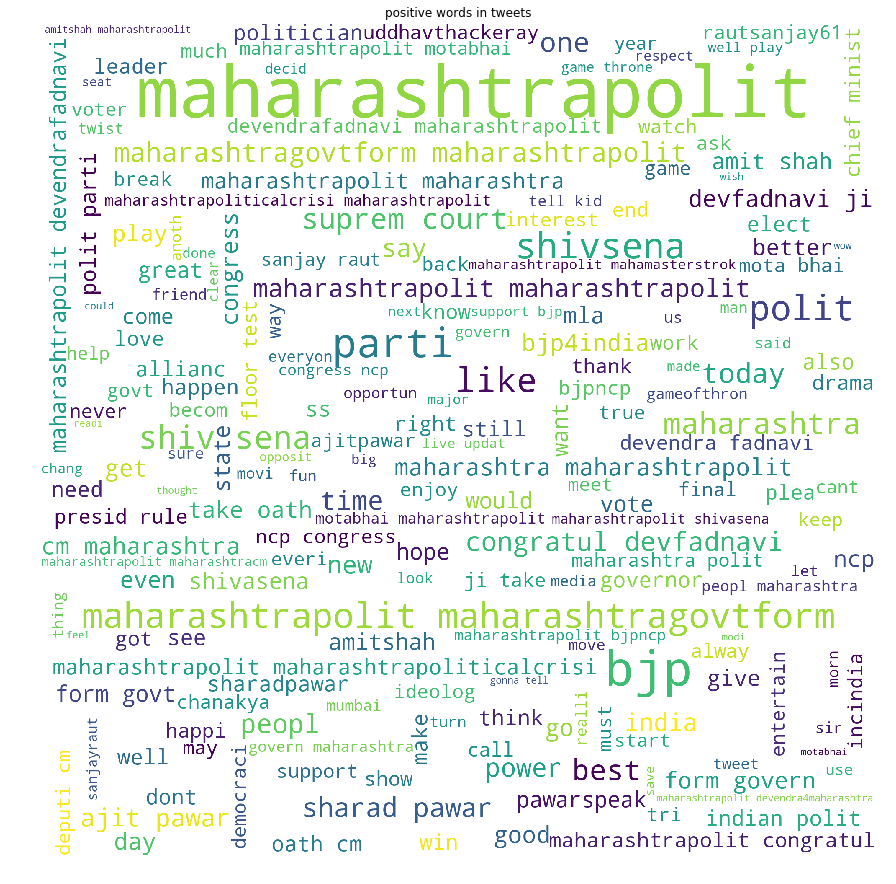

In [128]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, stopwords=set(stopwords.words('english')), background_color='white')
wordcloud = wordcloud.generate(' '.join(t6.loc[t6['sentiment']=='positive','cleaned_tweets'].tolist()))
plt.imshow(wordcloud)
plt.title("positive words in tweets")
plt.axis('off')
plt.show()

### by the above word cloud we can see that congrats, maharashtaragovtform, indian polit this says that congratulations for formation of government by congress

Text(0.5, 1.0, 'Negative words in tweets')

(-0.5, 1999.5, 1999.5, -0.5)

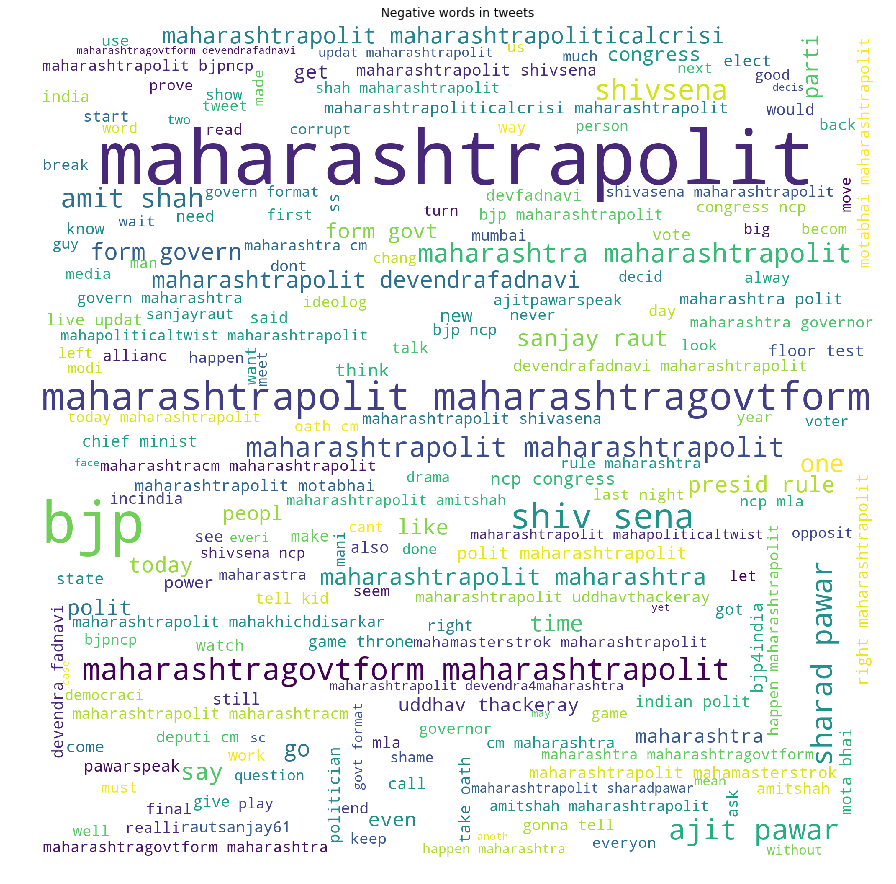

In [136]:
wordcloud = WordCloud(height=2000, width=2000, stopwords=set(stopwords.words('english')), background_color='white')
wordcloud = wordcloud.generate(' '.join(t6.loc[t6['sentiment']=='negative','cleaned_tweets'].tolist()))
plt.imshow(wordcloud)
plt.title("Negative words in tweets")
plt.axis('off')
plt.show()

### by the above wordcloud speaks about the Maharastra governement formation, and governer rule, maharastra govt form devandrafadri

### Let us build a ELBoW model for finding clusters

In [129]:
from sklearn.feature_extraction.text import CountVectorizer

In [130]:
bow=CountVectorizer()
bow_t6 = bow.fit_transform(t6['cleaned_tweets'])

In [131]:
len(bow.vocabulary_) # Get number of words in vocabulary

46417

In [132]:
## Let us take an sms and see how BoW modle has transformed it

twt=t6.iloc[20]['cleaned_tweets']
twt

'friday night throw back breezer gin bjp4india friday night sarkar banayeng maharashtrapolit'

In [133]:
twt_transform=bow.transform([twt])
print(twt_transform)

  (0, 3374)	1
  (0, 3625)	1
  (0, 4554)	1
  (0, 5215)	1
  (0, 11070)	2
  (0, 11647)	1
  (0, 17624)	1
  (0, 20517)	2
  (0, 39083)	1
  (0, 43088)	1


In [137]:
j = bow.transform([twt]).toarray()[0]

print('index\tterm\tcount')
for i in range(len(j)):
    if j[i] != 0:
        print(i, bow.get_feature_names()[i],j[i],sep='\t')

index	term	count
3374	back	1
3625	banayeng	1
4554	bjp4india	1
5215	breezer	1
11070	friday	2
11647	gin	1
17624	maharashtrapolit	1
20517	night	2
39083	sarkar	1
43088	throw	1


In [201]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(t6.cleaned_tweets)
text = tfidf.transform(t6.cleaned_tweets)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=8000, min_df=5,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

Fit 1 clusters
Fit 17 clusters
Fit 33 clusters


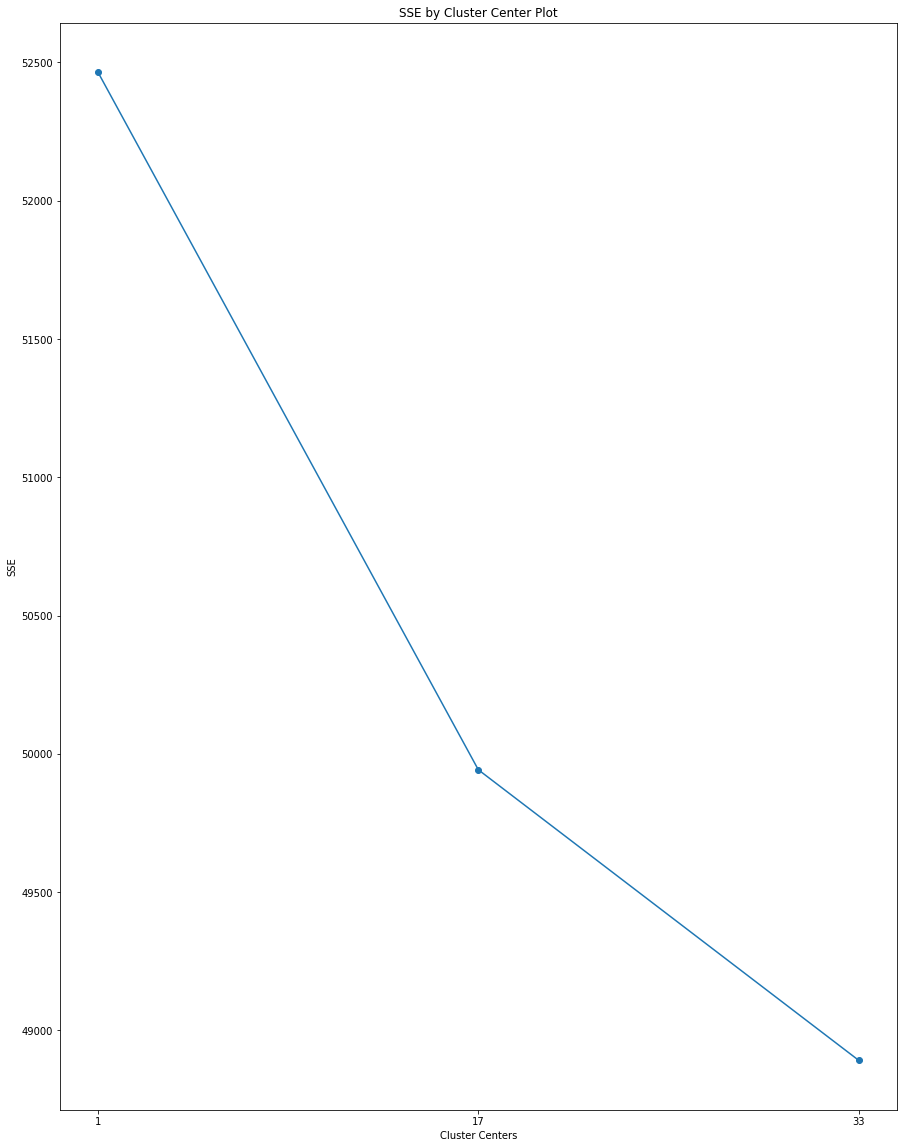

In [268]:
def find_optimal_clusters(t6, max_k):
    iters = range(1, max_k+29, 16)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(t6).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 20)

### By Elbow Method where there are 17 clusters 

In [271]:
clusters = MiniBatchKMeans(n_clusters=17, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

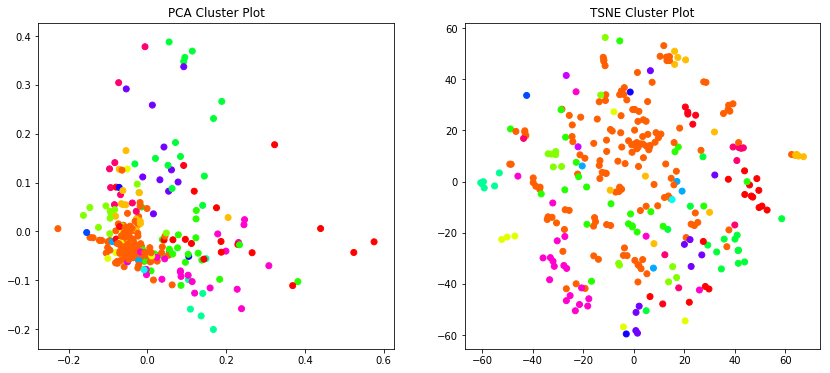

In [272]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(t6.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

### pca cluster plot is that principal compound analysis that makes that represents the high dimmensions to low dimmensions at one place

### TSNE Cluster Plot is that always produces a 2D separationk, in contrast to PCA which can produce many different components

In [273]:
def get_top_keywords(t6, clusters, labels, n_terms):
    df = pd.DataFrame(t6.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 12)


Cluster 0
raut,form,allianc,cm,support,maharashtragovtform,maharashtra,bjp,ncp,congress,shiv,sena

Cluster 1
day,maharashtrapoliticalcrisi,time,power,today,like,parti,peopl,game,maharashtra,maharashtragovtform,polit

Cluster 2
sanjayraut,bjpncp,thackeray,uddhav,motabhai,shivasena,uddhavthackeray,maharashtragovtform,raut,sanjay,devendrafadnavi,right

Cluster 3
shivsena,know,today,wtf,fuck,devendrafadnavi,maharashtragovtform,anyth,exactli,polit,maharashtra,happen

Cluster 4
bjpncp,game,ji,bjp4india,maharashtragovtform,polit,devendrafadnavi,motabhai,devfadnavi,narendramodi,chanakya,amitshah

Cluster 5
shivasena,mla,incindia,maharashtrapoliticalcrisi,support,parti,maharashtragovtform,maharashtra,congress,ncp,bjp,shivsena

Cluster 6
meet,say,leader,support,maharashtra,mla,maharashtragovtform,bjp,ncp,ajit,sharad,pawar

Cluster 7
approv,maharashtrapoliticalcrisi,state,presidentrul,revok,maharashtragovtform,recommend,impos,governor,maharashtra,rule,presid

Cluster 8
know,mla,shivsena,ncp,game

### Cluster0 speaks about the support maharastragovt, who will become cm of maharastra either congress or Bjp
### Cluster1 speaks aboout the playing game and drama in forming a maharastragovernment 
### cluster2 speaks about the bjp forms the government with sivasena
### cluster3 speaks about the bjp playing games and extrem ploitics and people are scolding them
### cluster4 speaks about the amit sha, narendramodi are playing games with maharastra government
### cluster5 speaks about the maharastra in crisis in forming the government
### cluster6 speaks about the meet all the leaders and lets form government toogether 
### like this each cluster makes some sense as they have close relationship between them.

### Topic Modeling

In [275]:
t6=t6[~pd.isnull(t6['cleaned_tweets'])]
t6.shape
#dictionary = corpora.Dictionary(data['cleaned_noun_adj_review'].tolist())

(53354, 16)

In [276]:
corpus=t6['cleaned_tweets'].tolist()

In [277]:
corpus

['would depend sharad pawar would choos exampl say peopl broken away parti without consent certainli antidefect law appli gaurav5173 maharashtrapolit',
 'frustrat newspap india maharashtrapolit mahamasterstrok shivasena pictwittercom9bwezneseq',
 'uddhavthackeray right maharashtrapolit pictwittercom0vobq8fhhb',
 'let trend anjanamaafiwapaslo urg anjanaomkashyap take back apolog call aaditya thackeray shiv sena ka rahul gandhi right use hashtag anjanamaafiwapaslo presidentrul maharashtragovtform maharashtrapolit',
 'priya dutt slam congress delay decis maharashtrapolit',
 'polit mein koi kisi ka dushman nahi hota hai ideolog secondari amaz us get fool fight get heat debat draw line left right centr categoris end power win facepalm maharashtrapolit',
 'koshiyari hoshiyari work mahamasterstrok maharashtrapolit',
 'amitshah rock thuglif maharashtrapolit',
 'person outwit chanakya polit could even secur enough number seat prepol allianc go parti thought aderv throughout life maharashtrapoli

#### To create term dictionary, we must have eah string tokenised

In [279]:
tokenised_corpus=[]
for corp in corpus:
    
    tokenised_corpus.append([token for token in corp.split(" ")])
tokenised_corpus

[['would',
  'depend',
  'sharad',
  'pawar',
  'would',
  'choos',
  'exampl',
  'say',
  'peopl',
  'broken',
  'away',
  'parti',
  'without',
  'consent',
  'certainli',
  'antidefect',
  'law',
  'appli',
  'gaurav5173',
  'maharashtrapolit'],
 ['frustrat',
  'newspap',
  'india',
  'maharashtrapolit',
  'mahamasterstrok',
  'shivasena',
  'pictwittercom9bwezneseq'],
 ['uddhavthackeray', 'right', 'maharashtrapolit', 'pictwittercom0vobq8fhhb'],
 ['let',
  'trend',
  'anjanamaafiwapaslo',
  'urg',
  'anjanaomkashyap',
  'take',
  'back',
  'apolog',
  'call',
  'aaditya',
  'thackeray',
  'shiv',
  'sena',
  'ka',
  'rahul',
  'gandhi',
  'right',
  'use',
  'hashtag',
  'anjanamaafiwapaslo',
  'presidentrul',
  'maharashtragovtform',
  'maharashtrapolit'],
 ['priya', 'dutt', 'slam', 'congress', 'delay', 'decis', 'maharashtrapolit'],
 ['polit',
  'mein',
  'koi',
  'kisi',
  'ka',
  'dushman',
  'nahi',
  'hota',
  'hai',
  'ideolog',
  'secondari',
  'amaz',
  'us',
  'get',
  'foo

In [280]:
dictionary = corpora.Dictionary(tokenised_corpus)

In [281]:
len(dictionary)

46447

In [283]:
dictionary[0] #word antidefect has index 0

'antidefect'

In [284]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenised_corpus]

In [285]:
doc_term_matrix[1] 

[(11, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)]

In [287]:
dictionary[20]

'india'

### Creating the object for LDA model using gensim library

In [288]:
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=17, random_state=100,
                chunksize=1000, passes=50)

In [289]:
lda_model.print_topics() ## gives the topics

[(0,
  '0.084*"mla" + 0.053*"maharashtrapolit" + 0.050*"ncp" + 0.046*"leader" + 0.039*"meet" + 0.038*"incindia" + 0.033*"parti" + 0.030*"shivsena" + 0.024*"ncpspeak" + 0.023*"pawarspeak"'),
 (1,
  '0.142*"maharashtrapolit" + 0.065*"devendrafadnavi" + 0.054*"maharashtragovtform" + 0.049*"motabhai" + 0.039*"shivasena" + 0.033*"uddhavthackeray" + 0.033*"bjpncp" + 0.030*"thackeray" + 0.029*"raut" + 0.029*"uddhav"'),
 (2,
  '0.101*"maharashtrapolit" + 0.087*"polit" + 0.031*"play" + 0.028*"game" + 0.025*"indian" + 0.018*"last" + 0.018*"real" + 0.016*"night" + 0.016*"day" + 0.015*"know"'),
 (3,
  '0.207*"sena" + 0.160*"shiv" + 0.043*"congress" + 0.037*"maharashtrapolit" + 0.032*"media" + 0.025*"ncp" + 0.023*"decis" + 0.019*"support" + 0.014*"alli" + 0.013*"letter"'),
 (4,
  '0.047*"2" + 0.033*"maharashtrapolit" + 0.031*"1" + 0.029*"3" + 0.025*"start" + 0.023*"move" + 0.021*"person" + 0.019*"yet" + 0.019*"famili" + 0.018*"lesson"'),
 (5,
  '0.226*"pawar" + 0.095*"sharad" + 0.089*"ajit" + 0.048

### Visualise Topics

In [291]:
# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim

In [292]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
9      0.144873 -0.053691  1       1        9.552013
2      0.141344  0.124283  2       1        8.459053
1      0.160387 -0.040399  3       1        8.239461
11     0.159568 -0.074596  4       1        8.121761
8      0.079324  0.114128  5       1        7.954573
10    -0.002321 -0.271102  6       1        7.486372
7      0.106302  0.015989  7       1        7.281514
12     0.072477  0.134868  8       1        6.508582
14     0.050206 -0.005106  9       1        5.695544
0     -0.011907 -0.237208  10      1        5.542817
16     0.020654  0.111275  11      1        4.102712
5     -0.115460 -0.053015  12      1        4.099690
15    -0.114031  0.104886  13      1        3.712549
3     -0.214331 -0.152743  14      1        3.665898
4     -0.174548  0.063664  15      1        3.570347
13    -0.128210  0.106732  16      1        3.125120
6     -0.174328  0.112033  17      1        2.881998, topic_info=     Category          Freq                          Term         Total  \
166   Default  10047.000000  bjp                           10047.000000   
13    Default  6652.000000   pawar                         6652.000000    
41    Default  5453.000000   sena                          5453.000000    
42    Default  4204.000000   shiv                          4204.000000    
384   Default  5473.000000   cm                            5473.000000    
305   Default  8226.000000   ncp                           8226.000000    
75    Default  7548.000000   polit                         7548.000000    
48    Default  5255.000000   congress                      5255.000000    
419   Default  3351.000000   mla                           3351.000000    
342   Default  4310.000000   devendrafadnavi               4310.000000    
16    Default  2785.000000   sharad                        2785.000000    
177   Default  2646.000000   shah                          2646.000000    
159   Default  6441.000000   shivsena                      6441.000000    
555   Default  2626.000000   ajit                          2626.000000    
14    Default  3130.000000   peopl                         3130.000000    
364   Default  3806.000000   form                          3806.000000    
361   Default  2358.000000   amit                          2358.000000    
321   Default  2647.000000   devfadnavi                    2647.000000    
152   Default  2868.000000   motabhai                      2868.000000    
43    Default  2485.000000   take                          2485.000000    
76    Default  2687.000000   power                         2687.000000    
602   Default  3774.000000   govern                        3774.000000    
587   Default  2923.000000   governor                      2923.000000    
674   Default  3405.000000   maharashtrapoliticalcrisi     3405.000000    
12    Default  4907.000000   parti                         4907.000000    
38    Default  9955.000000   maharashtragovtform           9955.000000    
365   Default  3244.000000   govt                          3244.000000    
129   Default  2283.000000   happen                        2283.000000    
24    Default  3235.000000   shivasena                     3235.000000    
141   Default  13447.000000  maharashtra                   13447.000000   
587   Topic1   2922.481201   governor                      2923.547852    
999   Topic1   2315.512939   rule                          2316.579590    
717   Topic1   2269.364258   presid                        2270.430908    
285   Topic1   1398.902100   live                          1399.969604    
948   Topic1   952.990662    updat                         954.058105     
222   Topic1   948.413147    format                        949.480591     
1157  Topic1   893.705444    floor                         894.772888     
451   Topic1   891.633728    court                         892.701172     
1159  Topic1   670.173889

## we can see that overal frequency in clusters of maharashtra ,shivsena, ncp, bjp are very high
### we can see that above figure that 1,3,4 clusters are not having much marginal gap those are very closer
### 7 and 9 have more marginal gap
### 14 and 12 are not having marginal topics atall

In [293]:
lda_model[doc_term_matrix[1]] #Gets the topic distribution of first document

[(7, 0.16622506), (11, 0.5501431), (15, 0.16597843)]

### TOPIC 15  DOMINANTE HERE WHAT IS THAT TOPIC..?

In [295]:
lda_model.show_topic(15)

[('shah', 0.099348545),
 ('amit', 0.088527136),
 ('maharashtrapolit', 0.07596804),
 ('modi', 0.03999548),
 ('hai', 0.0376211),
 ('bhai', 0.03392056),
 ('mota', 0.027711414),
 ('r', 0.017041044),
 ('ka', 0.016198562),
 ('ki', 0.015985776)]

### This is a list of tuple, with word and its score. We can extract the topic words from here. Let us use this to get dominant topic is each TWEETS

In [297]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=corpus)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0  0            8.0             0.5810               
1  1            11.0            0.5501               
2  2            1.0             0.7647               
3  3            1.0             0.4110               
4  4            3.0             0.6209               
5  5            13.0            0.3001               
6  6            11.0            0.5847               
7  7            1.0             0.4764               
8  8            16.0            0.2596               
9  9            6.0             0.3480               

                                                                                                                                                                               Keywords  \
0  maharashtrapolit, one, like, get, see, go, news, even, dont, drama                                                                                                                     
1  maharashtrapolit, maharashtrapoliticalcrisi, maharashtragovtform, maharashtra, shivsena, maharashtracm, mahamasterstrok, presidentrul, mahapoliticaltwist, shivsenacheatsmaharashtra   
2  maharashtrapolit, devendrafadnavi, maharashtragovtform, motabhai, shivasena, uddhavthackeray, bjpncp, thackeray, raut, uddhav                                                          
3  maharashtrapolit, devendrafadnavi, maharashtragovtform, motabhai, shivasena, uddhavthackeray, bjpncp, thackeray, raut, uddhav                                                          
4  sena, shiv, congress, maharashtrapolit, media, ncp, decis, support, alli, letter                                                                                                       
5  maharashtrapolit, twist, turn, question, moral, final, got, left, someon, place                                                                                                        
6  maharashtrapolit, maharashtrapoliticalcrisi, maharashtragovtform, maharashtra, shivsena, maharashtracm, mahamasterstrok, presidentrul, mahapoliticaltwist, shivsenacheatsmaharashtra   
7  maharashtrapolit, devendrafadnavi, maharashtragovtform, motabhai, shivasena, uddhavthackeray, bjpncp, thackeray, raut, uddhav                                                          
8  maharashtrapolit, never, polit, read, stop, ever, love, biggest, everyth, situat                                                                                                       
9  tell, good, maharashtrapolit, kid, gonna, u, pleas, us, guy, long                                                                                                                      

                                                                                                                                                                                                        Text  
0  would depend sharad pawar would choos exampl say peopl broken away parti without consent certainli antidefect law appli gaurav5173 maharashtrapolit                                                        
1  frustrat newspap india maharashtrapolit mahamasterstrok shivasena pictwittercom9bwezneseq                                                                                                                  
2  uddhavthackeray right maharashtrapolit pictwittercom0vobq8fhhb                                                                                                                                             
3  let trend anjanamaafiwapaslo urg anjanaomkashyap take back apolog call aaditya thackeray shiv sena ka rahul gandhi right use hashtag anjanamaafiwapaslo presidentrul maharashtragovtform maharashtrapolit  
4  priya dutt slam congress delay decis maharashtrapolit                                                                                                                                                      
5  polit mein koi kisi ka dushman nahi hota hai ideolog secondari amaz us get fool fight get heat debat draw

In [298]:
lda_model.log_perplexity(doc_term_matrix) #Perplexoity, lower the better

-10.694304780249995